# ***Анализ риска ДТП***

## 1. Описание проекта

Нам нужно создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения для каршеринговой компании. Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.

Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на исторические данные одного из регионов.

Идея решения задачи от заказчика:  

 - Создать модель предсказания ДТП (целевое значение — `at_fault` (виновник) в таблице `parties`)
 - Для модели выбрать тип виновника — только машина (`car`).
 - Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа `SCRATCH` (царапина).
 - Для моделирования ограничиться данными за 2012 год — они самые свежие.
 - Обязательное условие — учесть фактор возраста автомобиля.
 - На основе модели исследовать основные факторы ДТП.
 - Понять, помогут ли результаты моделирования и анализ важности факторов ответить на вопросы:
  - Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
  - Какие ещё факторы нужно учесть?
  - Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?  
  
Заказчик предлагает поработать с базой данных по происшествиям и сформировать свои идеи создания такой системы. 

## 2. Описание данных

Таблица `collisions` (информация о происшествиях):

 - Идентификационный номер в базе данных: `CASE_ID`	— уникальный номер для зарегистрированного происшествия в таблице происшествий.
 - Дата происшествия: `COLLISION_DATE` — Формат год/месяц/день.
 - Время происшествия: `COLLISION_TIME` — Формат: 24-часовой.
 - Является ли место происшествие перекрёстком:	`INTERSECTION`
  - `Y` — Intersection (перекрёсток)
  - `N` — Not Intersection (не перекрёсток)
  - `--` — Not stated (Не указано)
 - Погода: `WEATHER_1`
  - `A` — Clear (Ясно)
  - `B` — Cloudy (Облачно)
  - `C` — Raining (Дождь)
  - `D` — Snowing (Снегопад)
  - `E` — Fog (Туман)
  - `F` — Other (Другое)
  - `G` — Wind (Ветер)
  - `-` — Not Stated (Не указано)
 - Серьёзность происшествия: `COLLISION_DAMAGE`
  - `1` — FATAL ТС (Не подлежит восстановлению)
  - `2` — SEVERE DAMAGE (Серьёзный ремонт, большая часть под замену/Серьёзное повреждение капитального строения)
  - `3` — MIDDLE DAMAGE (Средний ремонт, машина в целом на ходу/Строение в целом устояло)
  - `4` — SMALL DAMAGE (Отдельный элемент кузова под замену/покраску)
  - `0` – SCRATCH (Царапина)
 - Основной фактор аварии: `PRIMARY_COLL_FACTOR`
  - `A` — Code Violation (Нарушение правил ПДД)
  - `B` — Other Improper Driving (Другое неправильное вождение)
  - `C` — Other Than Driver (Кроме водителя)
  - `D` — Unknown (Неизвестно)
  - `E` — Fell Asleep (Заснул)
  - `-` — Not Stated (Не указано)
 - Состояние дороги: `ROAD_SURFACE`
  - `A` — Dry (Сухая)
  - `B` — Wet (Мокрая)
  - `C` — Snowy or Icy (Заснеженная или обледенелая)
  - `D` — Slippery (Muddy, Oily, etc.) (Скользкая, грязная, маслянистая и т. д.)
  - `-` — Not Stated (Не указано)
 - Освещение: `LIGHTING`
  - `A` — Daylight (Дневной свет)
  - `B` — Dusk-Dawn (Сумерки-Рассвет)
  - `C` — Dark-Street Lights (Темно-Уличные фонари)
  - `D` — Dark-No Street Lights (Темно-Нет уличных фонарей)
  - `E` — Dark-Street Lights Not Functioning (Темно-Уличные фонари не работают)
  - `-` — Not Stated (Не указано)
 - Номер географических районов, где произошло ДТП:	`COUNTY_CITY_LOCATION` — число.
 - Названия географических районов, где произошло ДТП:	`COUNTY_LOCATION`	— список разных названий, категориальный тип данных.
 - Направление движения: `DIRECTION`
  - `N` — North (Север)
  - `E` — East (Восток)
  - `S` — South (Юг)
  - `W` — West (Запад)
  - `-` или `blank` — Not State (Не указано)
  - на перекрёстке
 - Расстояние от главной дороги (метры): `DISTANCE` — число.
 - Тип дороги:	`LOCATION_TYPE`
  - `H` — Highway (Шоссе)
  - `I` — Intersection (Перекрёсток)
  - `R` — Ramp (or Collector) (Рампа)
  - `-` или `blank` — Not State Highway (Не указано)
 - Количество участников: `PARTY_COUNT` — число.
 - Категория нарушения:	`PCF_VIOLATION_CATEGORY`
  - `01` — Driving or Bicycling Under the Influence of Alcohol or Drug (Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения)
  - `02` — Impeding Traffic (Препятствие движению транспорта)
  - `03` — Unsafe Speed (Превышение скорости)
  - `04` — Following Too Closely (Опасное сближение)
  - `05` — Wrong Side of Road (Неправильная сторона дороги)
  - `06` — Improper Passing (Неправильное движение)
  - `07` — Unsafe Lane Change (Небезопасная смена полосы движения)
  - `08` — Improper Turning (Неправильный поворот)
  - `09` — Automobile Right of Way (Автомобильное право проезда)
  - `10` — Pedestrian Right of Way (Пешеходное право проезда)
  - `11` — Pedestrian Violation (Нарушение пешеходами)
  - `12` — Traffic Signals and Signs (Дорожные сигналы и знаки)
  - `13` — Hazardous Parking (Неправильная парковка)
  - `14` — Lights (Освещение)
  - `15` — Brakes (Тормоза)
  - `16` — Other Equipment (Другое оборудование)
  - `17` — Other Hazardous Violation (Другие нарушения)
  - `18` — Other Than Driver (or Pedestrian) (Кроме водителя или пешехода)
  - `19` — Speeding (Скорость)
  - `20` — Pedestrian dui (Нарушение пешехода)
  - `21` — Unsafe Starting or Backing (Опасный старт)
  - `22` — Other Improper Driving (Другое неправильное вождение)
  - `23` — Pedestrian or “Other” Under the Influence of Alcohol or Drug (Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения)
  - `24` — Fell Asleep (Заснул)
  - `00` — Unknown (Неизвестно)
  - `-` — Not Stated (Не указано)
 - Тип аварии:	`TYPE_OF_COLLISION`
  - `A` — Head-On (Лоб в лоб)
  - `B` — Sideswipe (Сторона)
  - `C` — Rear End (Столкновение задней частью)
  - `D` — Broadside (Боковой удар)
  - `E` — Hit Object (Удар объекта)
  - `F` — Overturned (Опрокинутый)
  - `G` — Vehicle (транспортное средство/ Пешеход)
  - `H` — Other (Другое)
  - `-` — Not Stated (Не указано)
 - Дополнительные участники ДТП: `MOTOR_VEHICLE_INVOLVED_WITH`
  - `Other motor vehicle` (Другой автомобиль)
  - Fixed object (Неподвижный объект)
  - `Parked motor vehicle` (Припаркованный автомобиль)
  - `Pedestrian` (Пешеход)
  - `Bicycle` (Велосипедист)
  - `Non-collision` (Не столкновение)
  - `Other object` (Другой объект)
  - `Motor vehicle on other roadway` (Автомобиль на другой проезжей)
  - `Animal` (Животное)
  - `Train` (Поезд)
 - Дорожное состояние:	`ROAD_CONDITION_1`
  - `A` — Holes, Deep Ruts (Ямы, глубокая колея)
  - `B` — Loose Material on Roadway (Сыпучий материал на проезжей части)
  - `C` — Obstruction on Roadway (Препятствие на проезжей части)
  - `D` — Construction or Repair Zone (Зона строительства или ремонта)
  - `E` — Reduced Roadway Width (Уменьшенная ширина проезжей части)
  - `F` — Flooded (Затоплено)
  - `G` — Other (Другое)
  - `H` — No Unusual Condition (Нет ничего необычного)
  - `-` — Not Stated (Не указано)
 - Устройство управления: `CONTROL_CONDITION_1`
  - `A` — Functioning (Функционирует)
  - `B` — Not Functioning (Не функционирует)
  - `C` — Obscured (Затемнённый)
  - `D` — None (Нет)
  - `-` — Not Stated (Не указано)

Таблица `Parties` (описание участников происшествия):

 - Идентификационный  номер в базе данных: `CASE_ID` — Уникальный номер для зарегистрированного происшествия в таблице происшествий.
 - Номер участника происшествия: `PARTY_NUMBER` — От 1 до N — по числу участников происшествия.
 - Тип участника происшествия: `PARTY_TYPE`
  - `1` — Car (Авто)
  - `2` — Road bumper (Отбойник)
  - `3` — Building (Строения)
  - `4` — Road signs (Дорожные знаки)
  - `5` — Other (Другое)
  - `6` — Operator (Оператор)
  - `-` — Not Stated (Не указано)
 - Виновность участника:` AT_FAULT` —	0/1
 - Сумма страховки (тыс. $): `INSURANCE_PREMIUM` — число.
 - Состояние участника: физическое или с учётом принятых лекарств: `PARTY_DRUG_PHYSICAL`
  - `E` — Under Drug Influence (Под воздействием лекарств)
  - `F` — Impairment — Physical (Ухудшение состояния)
  - `G` — Impairment Unknown (Не известно)
  - `H` — Not Applicable (Не оценивался)
  - `I` — Sleepy/Fatigued (Сонный/Усталый)
  - `-` — Not Stated (Не указано)
 - Трезвость участника:	`PARTY_SOBRIETY`
  - `A` — Had Not Been Drinking (Не пил)
  - `B` — Had Been Drinking, Under Influence (Был пьян, под влиянием)
  - `C` — Had Been Drinking, Not Under Influence (Был пьян, не под влиянием)
  - `D` — Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно)
  - `G` — Impairment Unknown (Неизвестно ухудшение)
  - `H` — Not Applicable (Не оценивался)
  - `-` — Not Stated (Не указано)
 - Наличие телефона в автомобиле (возможности разговаривать по громкой связи):	`CELLPHONE_IN_USE` — 0/1

Таблица `Vehicles` (Описание автомобиля):

 - Индекс текущей таблицы:	`ID` — Номер в таблице.
 - Идентификационный номер в базе данных: `CASE_ID` —	Уникальный номер для зарегистрированного происшествия в таблице происшествий.
 - Тип кузова:	`VEHICLE_TYPE`
  - `MINIVAN`
  - `COUPE`
  - `SEDAN`
  - `HATCHBACK`
  - `OTHER`
 - Тип КПП:	`VEHICLE_TRANSMISSION`
  - `auto` (Автоматическая)
  - `manual` (Ручная)
  - `-` — Not Stated (Не указано)
 - Возраст автомобиля (в годах): `VEHICLE_AGE` — число.

## 3. Подключение к базе. Загрузка таблиц sql

In [1]:
!pip install shap scikit-learn==1.6.0 seaborn==0.13.2 numpy==1.20.1 matplotlib==3.7.0 pandas==1.2.4 -q
try:
    import phik
except:
    !pip install phik -q
    import phik
    
try:
    from catboost import Pool, CatBoostClassifier
except:
    !pip install catboost -q
    from catboost import Pool, CatBoostClassifier

In [ ]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import shap

from pandas.api.types import is_string_dtype

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    TargetEncoder,
    OneHotEncoder
)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    roc_auc_score,
    confusion_matrix,
    precision_score,
    recall_score,
    accuracy_score
)
from sklearn.dummy import DummyClassifier
from sqlalchemy import create_engine, text

In [3]:
sns.set()
#warnings.simplefilter('ignore')
RANDOM_STATE = 666
TEST_SIZE = 0.2
ALPHA = 0.05
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

In [ ]:
# конфигурация подключения к БД
db_config = {
'user': '...', # имя пользователя,
'pwd': '...', # пароль,
'host': '...',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
}

In [5]:
# создадим подключение к БД
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
) 

engine = create_engine(connection_string)

<a id='correction1'></a>
Проверим наличие таблиц в БД.

In [6]:
tables = ['collisions', 'parties', 'vehicles']
 
query = '''
SELECT EXISTS (
    SELECT 1
    FROM pg_catalog.pg_tables
    WHERE schemaname = 'public'
    AND tablename = '{}'
);
'''
for table in tables:
    with engine.connect() as connection:
        result = connection.execute(text(query.format(table))).scalar()  # Извлекаем булево значение
        exists = f"Таблица {table} существует!" if result else f"Таблица {table} не найдена."
        print(exists)

Таблица collisions существует!
Таблица parties существует!
Таблица vehicles существует!


Загрузим по 10 строк из каждой интересующей нас таблицы БД в датафреймы и сохраним их во вложенные списки списка `dfs` вместе с соответствующими описаниями таблиц.

In [7]:
query = '''
SELECT *
FROM {}
LIMIT 10
'''
dfs = ([['данные о происшествиях'], 
        ['данные об участниках происшествия'],
        ['данные об автомобиле']
       ])

for i, table_name in enumerate(tables):
    dfs[i].append(pd.read_sql_query(query.format(table_name), con = engine))

## 4. Первичное исследование таблиц

Для знакомства с данными используем вспомогательные функции.

In [8]:
# напишем функции для правописания слов "столбец" и "строка"
def row_word(row_num):
    if str(row_num)[-1] == '1':
        return 'строка'
    elif str(row_num)[-1] in '234' and row_num not in [11, 12, 13, 14]:
        return 'строки'
    else:
        return 'строк'

def col_word(col_num):
    if str(col_num)[-1] == '1':
        return 'столбец'
    elif str(col_num)[-1] in '234' and col_num not in [11, 12, 13, 14]:
        return 'столбца'
    else:
        return 'столбцов'

# напишем функцию для знакомства с датафреймом
def df_inf(df, description):
    print(f'\nРассмотрим датафрейм, содержащий {description}.\n')
    df.info()
    display(df.head().T)

    # подсчет строковых столбцов
    obj_col_num = 0
    for i in df.columns:
        if is_string_dtype(df[i]):
            obj_col_num += 1

    # подсчет строк и столбцов
    row_num = df.shape[0]
    col_num = df.shape[1]
    
    print(f'\nВ датафрейме {row_num} {row_word(row_num)} и {col_num} {col_word(col_num)}. Из них {obj_col_num}'
          f' {col_word(obj_col_num)} со строковыми значениями и {col_num - obj_col_num} с числовыми.')
    
# подсчет столбцов с пропусками, и составление списков такий колонок и количеств пропусков
    nan_col_num = 0
    nan_col_list = []
    nan_num_list = []
    for col in df.columns:
        nan_num = df[col].isna().sum()
        if nan_num > 0:
            nan_col_num += 1
            nan_col_list.append(col)
            nan_num_list.append(nan_num)

    print('-------------------------------------------------')

In [9]:
for df in dfs:
    df_inf(df[1], df[0])


Рассмотрим датафрейм, содержащий данные о происшествиях.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   case_id                      10 non-null     object 
 1   county_city_location         10 non-null     object 
 2   county_location              10 non-null     object 
 3   distance                     10 non-null     float64
 4   direction                    4 non-null      object 
 5   intersection                 10 non-null     int64  
 6   weather_1                    10 non-null     object 
 7   location_type                5 non-null      object 
 8   collision_damage             10 non-null     object 
 9   party_count                  10 non-null     int64  
 10  primary_collision_factor     10 non-null     object 
 11  pcf_violation_category       9 non-null      object 
 12  type_of_collision     

,0,1,2,3,4
case_id,4083072,4083075,4083073,4083077,4083087
county_city_location,1942,4313,0109,0109,4313
county_location,los angeles,santa clara,alameda,alameda,santa clara
distance,528.0,0.0,0.0,0.0,0.0
direction,north,None,None,None,None
intersection,0,1,1,1,1
weather_1,cloudy,clear,clear,clear,clear
location_type,highway,None,None,None,None
collision_damage,small damage,small damage,scratch,scratch,scratch
party_count,2,1,2,2,2



В датафрейме 10 строк и 20 столбцов. Из них 17 столбцов со строковыми значениями и 3 с числовыми.
-------------------------------------------------

Рассмотрим датафрейм, содержащий данные об участниках происшествия.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10 non-null     int64  
 1   case_id              10 non-null     object 
 2   party_number         10 non-null     int64  
 3   party_type           10 non-null     object 
 4   at_fault             10 non-null     int64  
 5   insurance_premium    4 non-null      float64
 6   party_sobriety       10 non-null     object 
 7   party_drug_physical  4 non-null      object 
 8   cellphone_in_use     9 non-null      float64
dtypes: float64(2), int64(3), object(4)
memory usage: 848.0+ bytes


,0,1,2,3,4
id,22,23,29,31,41
case_id,3899454,3899454,3899462,3899465,3899478
party_number,1,2,2,2,2
party_type,road signs,road signs,car,road signs,road bumper
at_fault,1,0,0,0,0
insurance_premium,29.0,7.0,21.0,24.0,NaN
party_sobriety,had not been drinking,had not been drinking,had not been drinking,had not been drinking,not applicable
party_drug_physical,None,None,None,None,not applicable
cellphone_in_use,0.0,0.0,0.0,0.0,0.0



В датафрейме 10 строк и 9 столбцов. Из них 4 столбца со строковыми значениями и 5 с числовыми.
-------------------------------------------------

Рассмотрим датафрейм, содержащий данные об автомобиле.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    10 non-null     int64 
 1   case_id               10 non-null     object
 2   party_number          10 non-null     int64 
 3   vehicle_type          10 non-null     object
 4   vehicle_transmission  10 non-null     object
 5   vehicle_age           10 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


,0,1,2,3,4
id,1175713,1,1175712,1175717,1175722
case_id,5305032,3858022,5305030,5305033,5305034
party_number,2,1,1,3,2
vehicle_type,sedan,sedan,sedan,sedan,sedan
vehicle_transmission,manual,auto,auto,auto,auto
vehicle_age,3,3,3,5,5



В датафрейме 10 строк и 6 столбцов. Из них 3 столбца со строковыми значениями и 3 с числовыми.
-------------------------------------------------


Мы видим, что все три упомянутые заказчиком таблицы присутствуют в БД, в них есть данные и общий ключ для связи таблиц в колонке `case_id`. На первый взгляд, за исключением несущественных отличий в названиях столбцов, данные соответствуют описанию.

##  5. Статистический анализ факторов ДТП

### 5.1 Количество аварий по месяцам

Выясним, в какие месяцы происходит наибольшее количество аварий, проанализировав весь период наблюдений (таблица collisions).

In [10]:
query = '''
SELECT EXTRACT(MONTH FROM c.collision_date)::integer AS month,
       COUNT(c.case_id) AS collisions_num
FROM collisions AS c
GROUP BY month
ORDER BY collisions_num DESC
'''

,month,collisions_num
0,3,139581
1,1,132044
2,5,130316
3,4,130180
4,2,128858
5,10,112237
6,12,107945
7,9,105159
8,11,104770
9,8,104089


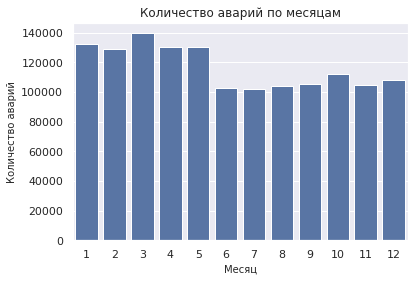

In [11]:
df = pd.read_sql_query(query, con = engine)
display(df)

sns.barplot(data=df, x='month', y='collisions_num');
plt.title('Количество аварий по месяцам');
plt.xlabel('Месяц');
plt.ylabel('Количество аварий');
plt.show()

Больше всего аварий в марте, январе и мае.

### 5.2 Задачи для рабочей группы

Определим 6 аналитических задач по исследованию факторов ДТП для рабочей группы.

 - Найти самые частые причины ДТП.
 - Выявить зависимость количества ДТП по вине водителя от времени суток.
 - Найти зависимость количества ДТП по вине водителя от его физического состояния с учетом принятых лекарств.
 - Установить количество ДТП по вине водителя в зависимости от его трезвости.
 - Построить распределение среднего количества водителей, учавствовавших в одном и том же ДТП, по годам совершения ДТП.
 - Установить автомобили с каким типом кузова и типом трансмиссии чаще всего попадают в ДТП.

Выполним пятую задачу. Для этого:
 - Сгруппируем записи в таблице `Parties` по id ДТП, посчитаем количество виновников для каждого ДТП (суммируя значения `et_fault`) и посчитаем участников ДТП.
 - Присоединим к результату предыдущего запроса записи из таблицы `collisions` по id ДТП, сгруппируем по году ДТП и посчитаем (округлив) среднее количество участников и виновных в ДТП для разных лет.

In [12]:
query = '''
WITH p AS (
           SELECT case_id AS id,
                  COUNT(DISTINCT party_number) AS party_num,
                  SUM(at_fault) AS fault_num
           FROM Parties
           WHERE party_type='car'
           GROUP BY case_id
)

SELECT ROUND(AVG(p.party_num), 2) AS mean_party_num,
       ROUND(AVG(p.fault_num), 2) AS mean_fault_num,
       EXTRACT(YEAR FROM c.collision_date)::integer AS year
FROM p JOIN collisions AS c ON p.id=c.case_id
GROUP BY EXTRACT(YEAR FROM c.collision_date)
ORDER BY EXTRACT(YEAR FROM c.collision_date)
'''

In [13]:
df = pd.read_sql_query(query, con = engine)

,mean_party_num,mean_fault_num,year
0,1.77,0.88,2009
1,1.77,0.90,2010
2,1.78,0.90,2011
3,1.78,0.90,2012
4,1.43,0.72,2013
5,1.50,1.00,2020


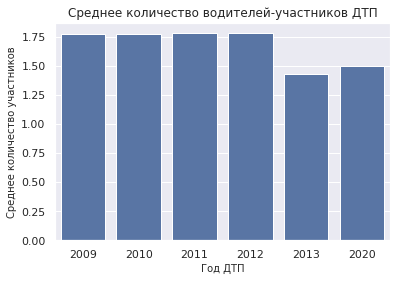

In [14]:
display(df)
sns.barplot(data=df, x='year', y='mean_party_num');
plt.title('Среднее количество водителей-участников ДТП');
plt.xlabel('Год ДТП');
plt.ylabel('Среднее количество участников');
plt.show()

Можно заключить, что до 2012 года включительно в среднем в авриях учавствовало 1.78 водителя, в 10% ДТП нет установленного виновника.

Выполним шестую задачу.

In [15]:
query = '''
SELECT COUNT(DISTINCT p.case_id) AS collisions_num,
       v.vehicle_type AS vehicle_type,
       v.vehicle_transmission AS vehicle_transmission
FROM Parties AS p JOIN vehicles AS v ON p.case_id=v.case_id AND p.party_number=v.party_number
GROUP BY v.vehicle_type, v.vehicle_transmission
'''

In [16]:
df = pd.read_sql_query(query, con = engine)

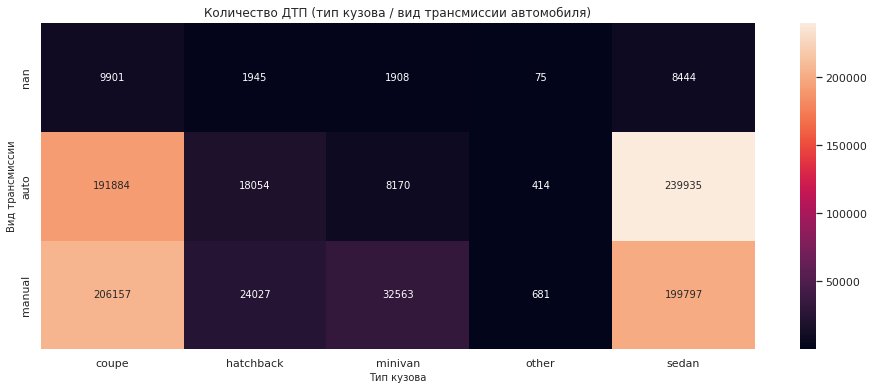

In [17]:
df = df.pivot('vehicle_transmission', 'vehicle_type', 'collisions_num')

plt.figure(figsize=(16, 6))
sns.heatmap(df,
            annot=True,
            fmt='');
plt.title('Количество ДТП (тип кузова / вид трансмиссии автомобиля)')
plt.xlabel('Тип кузова')
plt.ylabel('Вид трансмиссии')
plt.show()

Мы видим, что больше всего аврий с седанами с автоматмческой трансмиссией (возможно, ввиду общего количества таких авто). На втором месте купе с ручной трансмиссией - можно предположить, что водители таких автомобилей более склонны к рискованному стилю вождения.

## 6. Построение модели для оценки водительского риска

### 6.1 Загрузка данных

Подготовим набор данных на основе первичного предположения заказчика:
 - Тип виновника — только машина (car).
 - Возьмем случаи, когда ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
 - Для моделирования возьмем данные только за 2012 год.

In [18]:
query = '''
SELECT *
FROM collisions AS c 
JOIN Parties AS p ON c.case_id=p.case_id
JOIN vehicles AS v ON p.case_id=v.case_id AND p.party_number=v.party_number
WHERE c.collision_damage != 'scratch'
  AND p.party_type = 'car'
  AND EXTRACT(YEAR FROM c.collision_date) = 2012
ORDER BY c.case_id, p.id, v.id
'''

In [19]:
df = pd.read_sql_query(query, con = engine)

In [20]:
df.head().T

,0,1,2,3,4
case_id,5125160,5173738,5269486,5319820,5329109
county_city_location,3712,3404,3400,3607,3400
county_location,san diego,sacramento,sacramento,san bernardino,sacramento
distance,0.0,0.0,0.0,5.0,0.0
direction,None,None,None,east,None
intersection,1.0,1.0,1.0,0.0,1.0
weather_1,cloudy,clear,clear,clear,clear
location_type,None,None,None,None,None
collision_damage,small damage,small damage,small damage,small damage,middle damage
party_count,2,2,2,2,2


### 6.2 Первичный отбор факторов, необходимых для модели

Сразу отбросим все колонки с id, факторы 'party_number' и 'party_type' как очевидно нерелевантные для моделирования.

In [21]:
columns_to_drop = ['party_number', 'party_type']
for column in df.columns:
    if column in ['id', 'case_id']:
        columns_to_drop.append(column)
df = df.drop(columns_to_drop, axis=1)

Следует отметить, что у нас набор данных об уже произошедших ДТП, а не поездках с разным исходом, и целевым признаком является по сути виновность участника ДТП. Поэтому на наших данных мы можем предсказывать именно шанс участника ДТП оказаться его виновником, а не шанс произвольного водителя попасть в ДТП. Однако, логично предположить, что повышенный шанс оказаться виновником ДТП у определенного участника означает, что у этого водителя в целом был повышенный шанс попасть в ДТП до его совершения. Кроме того, с некоторой натяжкой совокупность невиновных участников аварии можно считать случайной выборкой из всех участников движения на заданном маршруте. То есть, факторы, значимые для оценки шанса оказаться виновником ДТП и модель, предсказывающая этот шанс, будут полезны и для оценки вероятности ДТП с любым повреждением транспортного средства для клиентов каршеринга.

Далее, для предсказания шанса попасть в ДТП следует исключить данные, которые мы можем получить только после самого ДТП (кроме целевого признака на обучении), т.е. следует оставить те факторы, которые мы можем учесть как только водитель забронировал автомобиль, сел за руль и выбрал маршрут. На этом основании мы можем исключить из рассмотрения следующие признаки:

In [22]:
columns_to_drop = [
    'intersection',
    'location_type',
    'distance',
    'direction',
    'collision_damage',
    'party_count',
    'primary_collision_factor',
    'pcf_violation_category',
    'type_of_collision',
    'motor_vehicle_involved_with',
    'insurance_premium',
    'party_sobriety',
    'party_drug_physical',
]
df = df.drop(columns_to_drop, axis=1)

<a id='correction2'></a>
Вероятно, признак `insurance_premium` обозначает страховые взносы водителя (согласно, например: https://www.investopedia.com/terms/i/insurance-premium.asp ). Возможно, заказчик сможет получить эти данные в момент бронирования автомобиля (скажем, через API страховой компании), и есть причина оставить этот признак для моделирования, так как по логике он может оказаться значимым. Признаки `party_sobriety` и `party_drug_physical` можно получить до начала поездки, например, установив в автомобили каршеринга алкотестеры и видеонаблюдение с возможностью анализа поведения водителя в момент его посадки в арендованный автомобиль. 

<a id='correction7'></a>
Все же, поскольку ни алкотестерами ни видеонаблюдением автомобили каршеринга не оборудованы, а трактовка признака `insurance_premium` неоднозначна, мы не будем учитывать эти факторы.

Дату и время аврии можно использовать как дату и время поездки, преобразовав их в месяц и час поездки. Временные факторы влияют на вероятность попасть в аварию. Географические данные, данные о состоянии дорог можно получить на основании введенного маршрута. Климатические данные на момент поездки также доступны. Все эти факторы очевидным образом могут повлиять на вероятность стать виновником аварии и, соответственно, вообще на вероятность попасть в ДТП.

### 6.3 Предобработка и исследовательский анализ данных

Ознакомимся с оставшимися данными с помощью созданных нами для этой цели функций.

In [23]:
# напишем функции для правописания слов "столбец" и "строка"
def row_word(row_num):
    if str(row_num)[-1] == '1':
        return 'строка'
    elif str(row_num)[-1] in '234' and row_num not in [11, 12, 13, 14]:
        return 'строки'
    else:
        return 'строк'

def col_word(col_num):
    if str(col_num)[-1] == '1':
        return 'столбец'
    elif str(col_num)[-1] in '234' and col_num not in [11, 12, 13, 14]:
        return 'столбца'
    else:
        return 'столбцов'

# напишем функцию для знакомства с датафреймом
def df_inf(df, description):
    print(f'\nРассмотрим датафрейм, содержащий {description}.\n')
    df.info()
    display(df.head().T)

    # подсчет строковых столбцов
    obj_col_num = 0
    for i in df.columns:
        if is_string_dtype(df[i]):
            obj_col_num += 1

    # подсчет строк и столбцов
    row_num = df.shape[0]
    col_num = df.shape[1]
    
    print(f'\nВ датафрейме {row_num} {row_word(row_num)} и {col_num} {col_word(col_num)}. Из них {obj_col_num}'
          f' {col_word(obj_col_num)} со строковыми значениями и {col_num - obj_col_num} с числовыми.')
    
# подсчет столбцов с пропусками, и составление списков такий колонок и количеств пропусков
    nan_col_num = 0
    nan_col_list = []
    nan_num_list = []
    for col in df.columns:
        nan_num = df[col].isna().sum()
        if nan_num > 0:
            nan_col_num += 1
            nan_col_list.append(col)
            nan_num_list.append(nan_num)
# составление таблицы пропусков
    if len(nan_col_list) > 0:
        nan_table = pd.DataFrame({'Столбец': nan_col_list,
                                  'Количество_пропусков': nan_num_list,})
        nan_table['Доля_пропусков'] = nan_table['Количество_пропусков'] / df.shape[0]
   
    if nan_col_num == 0:
        print(f'Пропущенных значений в датафрейме нет.')
    else:
        print(f'{nan_col_num} {col_word(nan_col_num)} {nan_col_list} содержат пропущенные значения.')

    if len(nan_col_list) > 0:
        display(nan_table)
    print('-------------------------------------------------')

In [24]:
df_inf(df, 'данные о ДТП')


Рассмотрим датафрейм, содержащий данные о ДТП.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   county_city_location  56248 non-null  object 
 1   county_location       56248 non-null  object 
 2   weather_1             56080 non-null  object 
 3   road_surface          55900 non-null  object 
 4   road_condition_1      55999 non-null  object 
 5   lighting              56094 non-null  object 
 6   control_device        56033 non-null  object 
 7   collision_date        56248 non-null  object 
 8   collision_time        56160 non-null  object 
 9   at_fault              56248 non-null  int64  
 10  cellphone_in_use      51777 non-null  float64
 11  vehicle_type          56248 non-null  object 
 12  vehicle_transmission  55389 non-null  object 
 13  vehicle_age           54554 non-null  float64
dtypes: float64(2), int64(

,0,1,2,3,4
county_city_location,3712,3404,3400,3607,3400
county_location,san diego,sacramento,sacramento,san bernardino,sacramento
weather_1,cloudy,clear,clear,clear,clear
road_surface,dry,dry,dry,dry,dry
road_condition_1,other,normal,normal,normal,normal
lighting,daylight,daylight,daylight,dark with street lights,daylight
control_device,none,none,functioning,functioning,functioning
collision_date,2012-03-30,2012-04-02,2012-11-13,2012-09-05,2012-11-03
collision_time,07:40:00,12:54:00,16:35:00,19:32:00,13:15:00
at_fault,0,0,0,0,0



В датафрейме 56248 строк и 14 столбцов. Из них 11 столбец со строковыми значениями и 3 с числовыми.
9 столбцов ['weather_1', 'road_surface', 'road_condition_1', 'lighting', 'control_device', 'collision_time', 'cellphone_in_use', 'vehicle_transmission', 'vehicle_age'] содержат пропущенные значения.


,Столбец,Количество_пропусков,Доля_пропусков
0,weather_1,168,0.002987
1,road_surface,348,0.006187
2,road_condition_1,249,0.004427
3,lighting,154,0.002738
4,control_device,215,0.003822
5,collision_time,88,0.001565
6,cellphone_in_use,4471,0.079487
7,vehicle_transmission,859,0.015272
8,vehicle_age,1694,0.030117


-------------------------------------------------


По ТЗ признак `vehicle_age` является важным и должен быть учтен, кроме того значения этого признака всегда доступны для каршеринга, поэтому отбросим наблюдения с пропусками в этом признаке (это всего 3% данных).

In [25]:
df = df.dropna(subset=['vehicle_age']).reset_index(drop=True)

Пропуски в количественном признаке с данными о страховке мы заполним медианными значениями в пайплайне.  
Признак `cellphone_in_use` хоть и имеет числовые значения, в действительности является категориальным. Заменим в нем числа на категории в пайплайне.

Далее, заменим пропуски в категориальных признаках на значения `unknown` (для удобства сейчас и аналогично в пайплайне).

In [26]:
for col in df.columns:
    if is_string_dtype(df[col]):
        df[col].fillna('unknown', inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54554 entries, 0 to 54553
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   county_city_location  54554 non-null  object 
 1   county_location       54554 non-null  object 
 2   weather_1             54554 non-null  object 
 3   road_surface          54554 non-null  object 
 4   road_condition_1      54554 non-null  object 
 5   lighting              54554 non-null  object 
 6   control_device        54554 non-null  object 
 7   collision_date        54554 non-null  object 
 8   collision_time        54554 non-null  object 
 9   at_fault              54554 non-null  int64  
 10  cellphone_in_use      50384 non-null  float64
 11  vehicle_type          54554 non-null  object 
 12  vehicle_transmission  54554 non-null  object 
 13  vehicle_age           54554 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 5.8+ MB


Создадим словарь с описаниями признаков.

In [28]:
features = {
    'county_city_location': 'Номер географических районов',
    'county_location': 'Названия географических районов',
    'weather_1': 'Погода',
    'road_surface': 'Состояние дороги',
    'road_condition_1': 'Дорожное состояние',
    'lighting': 'Освещение',
    'control_device': 'Устройство управления',
    'at_fault': 'Виновность участника',
    'cellphone_in_use': 'Наличие телефона в автомобиле',
    'vehicle_type': 'Тип кузова',
    'vehicle_transmission': 'Тип КПП',
    'vehicle_age': 'Возраст автомобиля (в годах)',
    'month': 'Месяц аварии',
    'hour': 'Час аварии'
}

Проведем исследовательский анализ признаков.

Напишем фунцию для вывода статистик и графиков, характеризующих исследуемый признак.

In [29]:
def describe_feature(df,
                     column,
                     bins=100,
                     as_cat=False,
                     num_unique=50,
                     norm_test=True,
                     min_p_value=0.00001,
                     figsize=(12, 6),
                     target=None ):
    """
    Для строковых столбцов функция выводит частотную таблицу и круговую диаграмму или
    столбчатый график (при количестве уникальных значений признака большем 3-х).
    Если передан целевой признак, выводится столбчатый график медианных значений целевого
    признака для категорий исследуемого категориального признака. В задаче регрессии 
    выводится столбчатый график медианных значений целевого признака для категорий 
    рассматриваемого параметра. В задаче классификации - гистограмма категорий признака
    с детализацией по целевым классам.

    Если as_cat=True или при небольшом количестве уникальных значений (количество уникальных
    значений признака меньше num_unique) количественный признак считается дискретным и
    описывается аналогично категориальному.

    Для числовых непрерывных данных выводятся стататистики методом describe(), гистограмма и
    "ящик с усами". Если передан целевой признак, выводится диаграмма рассеяния исследуемого и 
    целевого признаков. Если norm_test=True, то делается тест на нормальность распределения.
    При этом, если p-value теста меньше ALPHA, но больше значения min_p_value,
    то распределение считается похожим на нормальное. В задаче регрессиии (большое количество 
    уникальных числовых значений целевого признака) выводится диаграмма разброса, в задаче
    классификации - столбчатый график медианных значений признака для целевых классов.
    
    В параметр target можно передать название колонки с целевым признаком.
    """
    
# выводим название признака, учитывая, является ли он целевым или входным
    if target:
        if column == target:
            print(f"\n          === Целевой признак '{features[column]}' ===\n")
        else:
            print(f"\n          === Входной признак '{features[column]}' ===\n")
    else:
        print(f"\n          === Признак '{features[column]}' ===\n")

# исследование категориального или дискретного количественного признака
    if is_string_dtype(df[column]) or as_cat or df[column].nunique() < num_unique:
        
        if is_string_dtype(df[column]):
            type_of_param = 'Перед нами категориальный параметр. '
        else:
            type_of_param = 'Перед нами категориальный параметр. '
        
        df_value_counts = df[column].value_counts()
        print('Частоты значений признака:')
        display(df_value_counts)
        
        print('Всего категорий в признаке:', len(df_value_counts))
        
        fig, ax = plt.subplots(figsize=figsize);
        if len(df_value_counts) < 4:
            df_value_counts.plot(kind='pie', autopct="%.2f%%");
            plt.title(f'Круговая диаграмма признака {features[column]}');
            plt.ylabel('');
            plt.show()
        elif len(df_value_counts) < 50:
            df_value_counts.plot(kind='bar');
            plt.title(f'Частоты категорий признака {features[column]}');
            plt.xlabel(features[column])
            plt.show()
        else:
            df_value_counts[:50].plot(kind='bar');
            plt.title(f'Частоты категорий признака {features[column]} (50 наибольших категорий)');
            plt.xlabel(features[column])
            plt.show()

# в случае регрессии выведем столбчатый график медианных значений целевого признака для категорий
        if target and len(df[target][:100].value_counts()) > 10:
            sorted_values = df.groupby(column)[target].agg('median').sort_values(ascending=False)

            if target and len(sorted_values) < 50 and column != target:
                fig, ax = plt.subplots(figsize=figsize);
                sorted_values.plot(kind='bar');
                plt.title(f'Медианные значения {features[target]} для категорий признака {features[column]}');
                plt.ylabel(f'Медианные значения {features[target]}')
                plt.xlabel(features[column])
                plt.show()
            elif target and column != target:
                sorted_values[:50].plot(kind='bar');
                fig, ax = plt.subplots(figsize=figsize);
                plt.title(f'50 наибольших медианных значений {features[target]} для категорий признака {features[column]}');
                plt.ylabel(f'Медианные значения {features[target]}')
                plt.xlabel(features[column])
                plt.show()

# в случае классификации гистограммы классов для значений категорий
        elif target:
            cat_number = df[column].value_counts()

            if target and len(cat_number) < 50 and column != target:
                fig, ax = plt.subplots(figsize=figsize);
                splot = sns.histplot(x=df[column].apply(lambda x: str(x)+' ' if x is not np.nan else x),
                                     hue=df[target],
                                     multiple='dodge',
                                     shrink=0.8,
                                     bins=len(cat_number));
                if len(cat_number) < 10:
                    for p in splot.patches: 
                        splot.annotate(format(p.get_height(), '.0f'), 
                               (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha='center', va='center', 
                               xytext=(0, 9), 
                               textcoords='offset points')
                plt.title(f'Частоты категорий признака {features[column]} по целевым классам');
                plt.ylabel(f'Частоты категорий')
                plt.xlabel(features[column])
                plt.xticks(rotation=90)
                plt.show()
            elif target and column != target:
                fig, ax = plt.subplots(figsize=figsize);
                sns.histplot(data=df[df[column].isin(cat_number[:50].index)],
                             x=column,
                             hue=target,
                             multiple='dodge',
                             shrink=0.8);
                plt.title(f'Частоты 50-ти наибольших категорий {features[target]} по целевым классам');
                plt.ylabel(f'Медианные значения {features[target]}')
                plt.xlabel(features[column])
                plt.xticks(rotation=90)
                plt.show()

            
            
# для категориальных данных опишем характеристики частотной таблицы
        df_value_counts_sorted = df_value_counts.sort_values(ascending=False)
        description = f"{type_of_param}"
        
        if len(df_value_counts) < 15:
            description += (f"Значениями столбца '{features[column]}' являются: " 
                            + str(list(df_value_counts.index))[1:-1] + ". \n")
        else:
            description += (f"Значениями столбца '{features[column]}' являются: " 
                            + str(list(df_value_counts.index[:14]))[1:-1] + ", ... \n")
            
        for i, x in enumerate(df_value_counts_sorted):
            if i == 0:
                description += (f"Чаще всего ({x} {row_word(x)} или {x/len(df):.2%} "
                                f"наблюдений) признак '{features[column]}' принимает значение "
                                f"'{df_value_counts_sorted.index[i]}'")
            elif i == len(df_value_counts_sorted) - 1:
                description += (f", в наименьшем количестве наблюдений ({x} {row_word(x)}"
                                f"  или {x/len(df):.2%} наблюдений) этот признак принимает"
                                f" значение '{df_value_counts_sorted.index[i]}'.")
        print(description)            

# для числовых данных выведем стататистики, гистограмму, ящик с усами и диаграмму рассеяния
    else:
        stats = df[column].describe()
        display(stats)
    
        fig, ax = plt.subplots(figsize=figsize);
        plt.hist(df[column], bins=bins);
        plt.axvline(x=df[column].median(), color='red', label='Медиана');
        plt.axvline(x=df[column].mean(), color='red', label='Среднее', linestyle='--');
        plt.legend()
        plt.title(f'Гистограмма признака {features[column]}')
        plt.xlabel(features[column])
        plt.show();

        fig, ax = plt.subplots(figsize=figsize);
        df[column].plot(kind='box');
        plt.title(f'График ящик с усами признака {features[column]}')
        plt.show()

# в случае регрессии выведем диаграмму рассеяния
        if target and column != target and len(df[target][:100].value_counts()) > 10:
            fig, ax = plt.subplots(figsize=figsize);
            sns.scatterplot(data=df, x=column, y=target);
            plt.title(f'Диаграмма рассеяния признаков {features[column]} и {features[target]}')
            plt.xlabel(features[column])
            plt.ylabel(features[target])
            plt.show()

# в случае классификации выведем столбчатый график медианных значений признака для разных классов
        elif target and column != target:
            fig, ax = plt.subplots(figsize=figsize);
            splot = sns.barplot(data=df, y=column, hue=target, estimator='median', gap=0.8)
            for p in splot.patches: 
                splot.annotate(format(p.get_height(), '.0f'), 
                               (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha='center', va='center', 
                               xytext=(0, 9), 
                               textcoords='offset points')
            plt.title(f'Медианные значения {features[column]} для целевых классов')
            plt.ylabel(f'Медианные значения {features[column]}')
            plt.xlabel('')
            plt.show() 
                      
# для количественных данных опишем статистические характеристики распределения
        description = (f"Количественный признак '{features[column]}' принимает значения в диапазоне"
                       f" от {stats.loc['min']} до {stats.loc['max']:.2f}. Среднее значение"
                       f" признака '{column}' - {stats.loc['mean']:.2f}, медианное - "
                       f"{stats.loc['50%']:.2f}. Величина стандартного отклонения: "
                       f"{stats.loc['std']:.2f}. ")

# для количественных параметров проверим, можно ли говорить о нормальном распределении признака
        if norm_test:
            normal_test = st.normaltest(df[column].dropna())
            if normal_test.pvalue >= ALPHA:
                description += (f'По результатам теста на нормальность распределения (p-value = '
                                f'{normal_test.pvalue}) мы можем с достаточной степенью '
                                f'уверенности считать признак нормально распределенным. ')
            elif normal_test.pvalue >= min_p_value:
                description += (f'Распределение признака похоже на нормальное. Значение p-value'
                                f' теста на нормальность распределения: {normal_test.pvalue}.')
            else:
                description += (f'Можно с достаточной степенью уверенности утверждать, что '
                                f'распределение признака не является нормальным. Значение p-value'
                                f' теста на нормальность распределения: {normal_test.pvalue}.')
                
        print(description)

Исследуем целевой признак.


          === Целевой признак 'Виновность участника' ===

Частоты значений признака:


1    27541
0    27013
Name: at_fault, dtype: int64

Всего категорий в признаке: 2


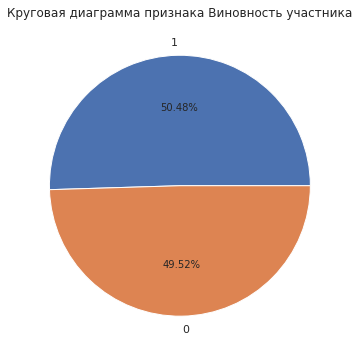

Перед нами категориальный параметр. Значениями столбца 'Виновность участника' являются: 1, 0. 
Чаще всего (27541 строка или 50.48% наблюдений) признак 'Виновность участника' принимает значение '1', в наименьшем количестве наблюдений (27013 строки  или 49.52% наблюдений) этот признак принимает значение '0'.


In [30]:
describe_feature(df, 'at_fault', target='at_fault')

Данные сбалансированы, целевой признак не требует предобработки и кодирования.

Исследуем признак признаки `county_city_location`и `county_location`.


          === Входной признак 'Номер географических районов' ===

Частоты значений признака:


1942    6735
1900    2201
3711    1312
3400    1070
3600     997
        ... 
2803       1
4003       1
5003       1
1701       1
1924       1
Name: county_city_location, Length: 494, dtype: int64

Всего категорий в признаке: 494


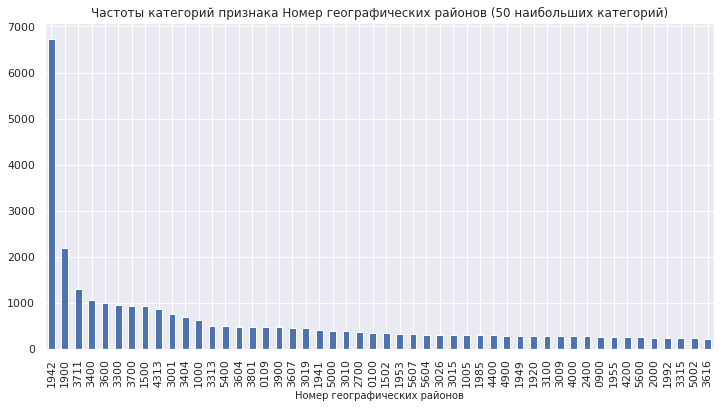

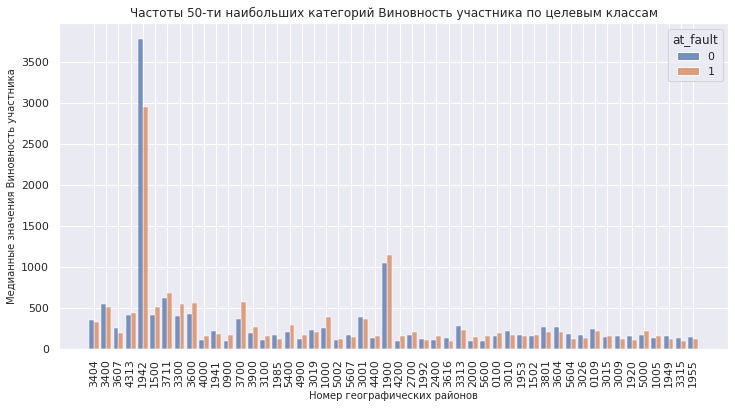

Перед нами категориальный параметр. Значениями столбца 'Номер географических районов' являются: '1942', '1900', '3711', '3400', '3600', '3300', '3700', '1500', '4313', '3001', '3404', '1000', '3313', '5400', ... 
Чаще всего (6735 строк или 12.35% наблюдений) признак 'Номер географических районов' принимает значение '1942', в наименьшем количестве наблюдений (1 строка  или 0.00% наблюдений) этот признак принимает значение '1924'.

          === Входной признак 'Названия географических районов' ===

Частоты значений признака:


los angeles        15715
orange              5079
san diego           3675
san bernardino      3592
riverside           3205
sacramento          2116
alameda             1838
santa clara         1779
ventura             1441
kern                1389
fresno              1057
contra costa         956
san mateo            915
san joaquin          892
stanislaus           786
santa barbara        704
tulare               700
sonoma               677
placer               557
monterey             550
solano               540
san francisco        483
san luis obispo      428
santa cruz           422
merced               383
marin                361
madera               320
humboldt             319
butte                312
el dorado            286
shasta               275
yolo                 266
kings                244
napa                 208
imperial             205
mendocino            189
nevada               181
tehama               145
sutter               143
tuolumne             122


Всего категорий в признаке: 58


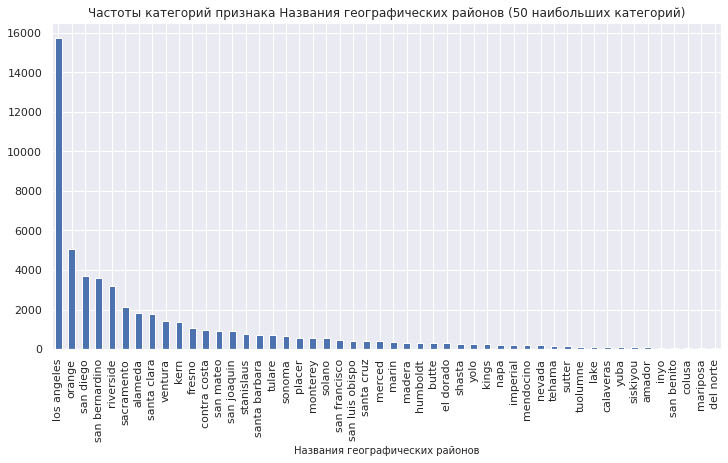

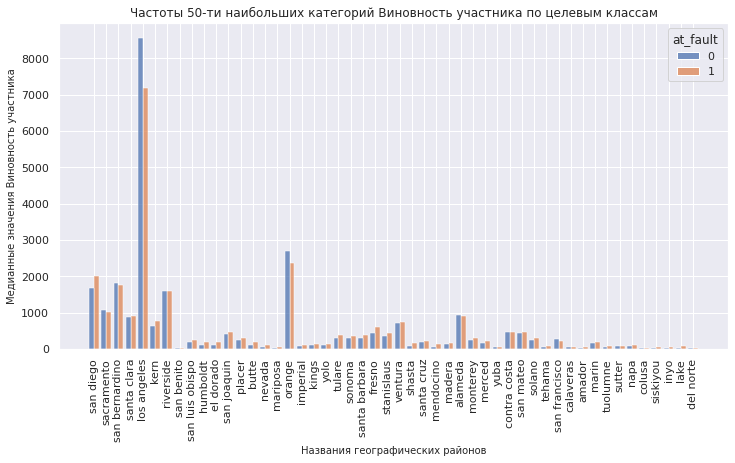

Перед нами категориальный параметр. Значениями столбца 'Названия географических районов' являются: 'los angeles', 'orange', 'san diego', 'san bernardino', 'riverside', 'sacramento', 'alameda', 'santa clara', 'ventura', 'kern', 'fresno', 'contra costa', 'san mateo', 'san joaquin', ... 
Чаще всего (15715 строк или 28.81% наблюдений) признак 'Названия географических районов' принимает значение 'los angeles', в наименьшем количестве наблюдений (14 строк  или 0.03% наблюдений) этот признак принимает значение 'sierra'.


In [31]:
for column in ['county_city_location', 'county_location']:
    describe_feature(df, column, target='at_fault')

Судя по названиям районов, можно заключить, что наши данные относятся к ДТП, произошедшим в разных районах Калифорнии.

Количество аварий и соотношение классов целевого признака существенно варьируется для разных районов. Признак может быть значим для предсказания виновности участника ДТП. Однако в будующем следует принять во внимание, что на предсказание шанса попасть в ДТП влияние этих факторов может существенным образом отличаться, поскольку, как уже отмечалось, в нашей выборке содержится информация только об участниках аварий и нет информации о тех, кто в ДТП не попадал. Например, вариации в соотношении классов целевого признака могут объясняеться для нашей выборки различием в среднем количестве участников аварий для разных районов, а не средним количеством аварий на водителя или поездку в этих районах. Подобную оговорку можно сделать для многих признаков из нашего датасета.

Далее, рассмотрим признак `weather_1`.


          === Входной признак 'Погода' ===

Частоты значений признака:


clear      43726
cloudy      8178
raining     2115
fog          173
unknown      165
snowing      154
other         32
wind          11
Name: weather_1, dtype: int64

Всего категорий в признаке: 8


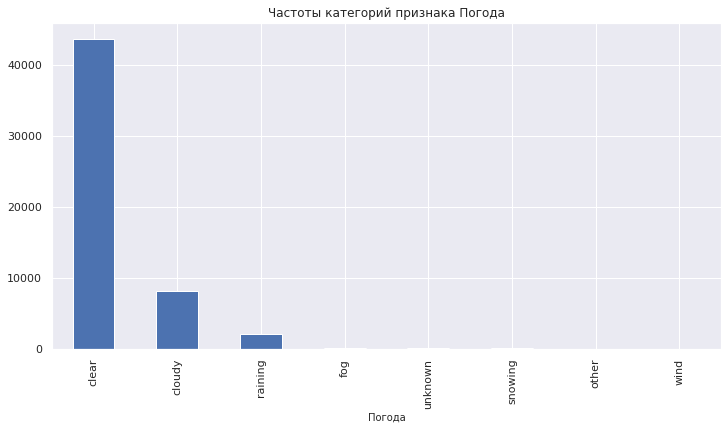

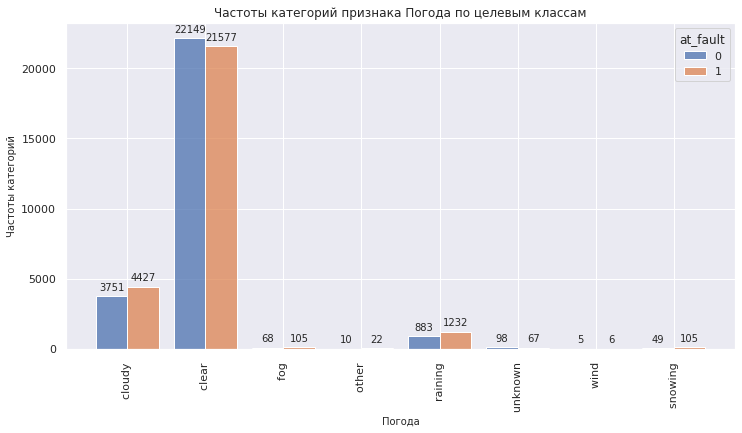

Перед нами категориальный параметр. Значениями столбца 'Погода' являются: 'clear', 'cloudy', 'raining', 'fog', 'unknown', 'snowing', 'other', 'wind'. 
Чаще всего (43726 строк или 80.15% наблюдений) признак 'Погода' принимает значение 'clear', в наименьшем количестве наблюдений (11 строка  или 0.02% наблюдений) этот признак принимает значение 'wind'.


In [32]:
 describe_feature(df, 'weather_1', target='at_fault')

Наибольшее количество ДТП прозошло в ясную погоду, что не удивительно - такая погода характерна для Калифорнии. В других регионах ситуация может существенно отличаться.

Далее, рассмотрим признак `road_surface`.


          === Входной признак 'Состояние дороги' ===

Частоты значений признака:


dry         48713
wet          5119
snowy         351
unknown       329
slippery       42
Name: road_surface, dtype: int64

Всего категорий в признаке: 5


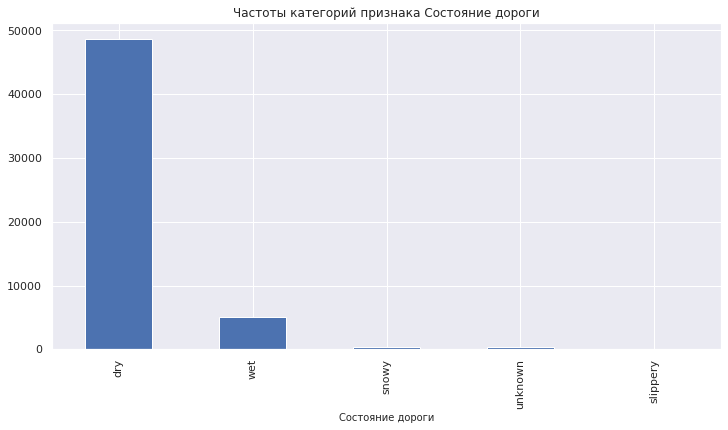

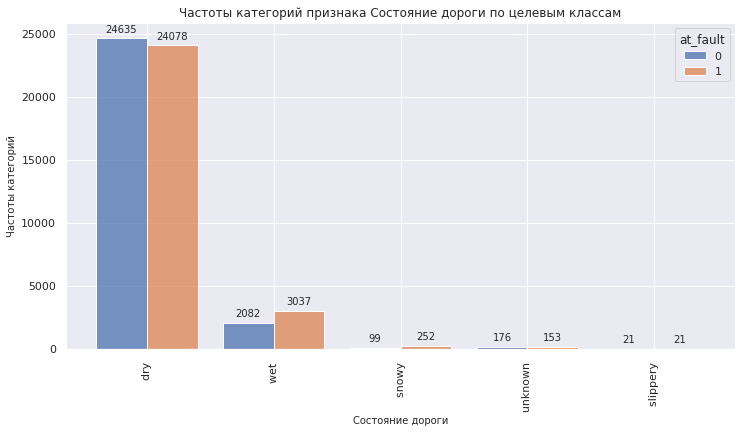

Перед нами категориальный параметр. Значениями столбца 'Состояние дороги' являются: 'dry', 'wet', 'snowy', 'unknown', 'slippery'. 
Чаще всего (48713 строки или 89.29% наблюдений) признак 'Состояние дороги' принимает значение 'dry', в наименьшем количестве наблюдений (42 строки  или 0.08% наблюдений) этот признак принимает значение 'slippery'.


In [33]:
describe_feature(df, 'road_surface', target='at_fault')

Большинство аварий произошло на сухих дорогах, что, учитывая калифорнийский климат, также не удивительно. В снежную погоду процент виновников ДТП от общего количества участников значительно возрастает.

Далее, рассмотрим признак `road_condition_1`.


          === Входной признак 'Дорожное состояние' ===

Частоты значений признака:


normal            52433
construction        987
obstruction         242
unknown             237
other               220
holes               215
loose material      125
reduced width        65
flooded              30
Name: road_condition_1, dtype: int64

Всего категорий в признаке: 9


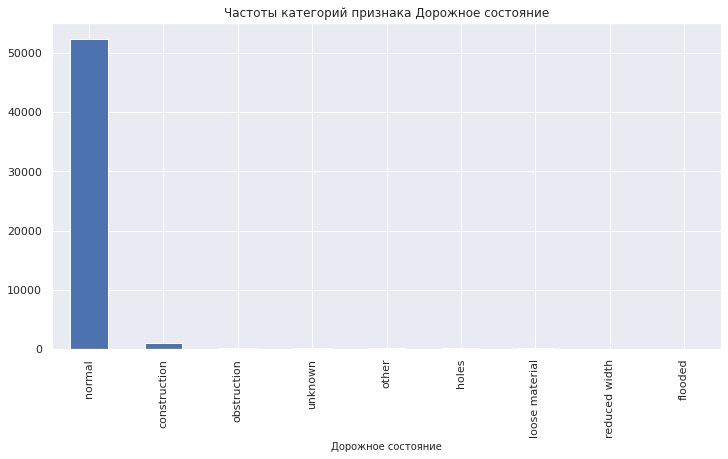

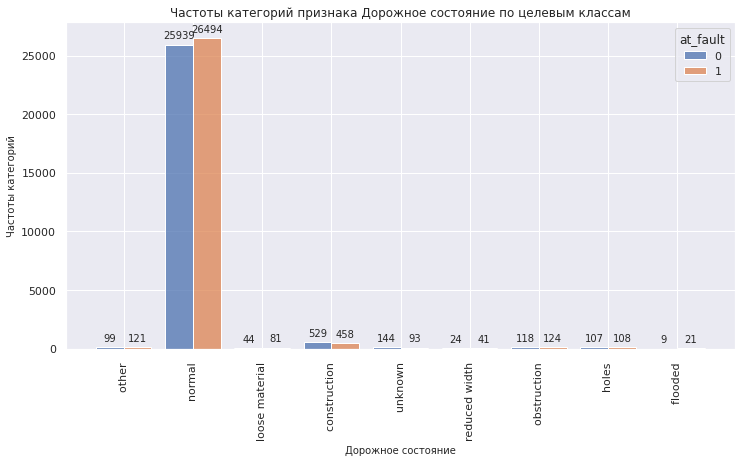

Перед нами категориальный параметр. Значениями столбца 'Дорожное состояние' являются: 'normal', 'construction', 'obstruction', 'unknown', 'other', 'holes', 'loose material', 'reduced width', 'flooded'. 
Чаще всего (52433 строки или 96.11% наблюдений) признак 'Дорожное состояние' принимает значение 'normal', в наименьшем количестве наблюдений (30 строк  или 0.05% наблюдений) этот признак принимает значение 'flooded'.


In [34]:
describe_feature(df, 'road_condition_1', target='at_fault')

Рассмотрим признак `lighting`.


          === Входной признак 'Освещение' ===

Частоты значений признака:


daylight                                   36907
dark with street lights                    10599
dark with no street lights                  5045
dusk or dawn                                1720
unknown                                      152
dark with street lights not functioning      131
Name: lighting, dtype: int64

Всего категорий в признаке: 6


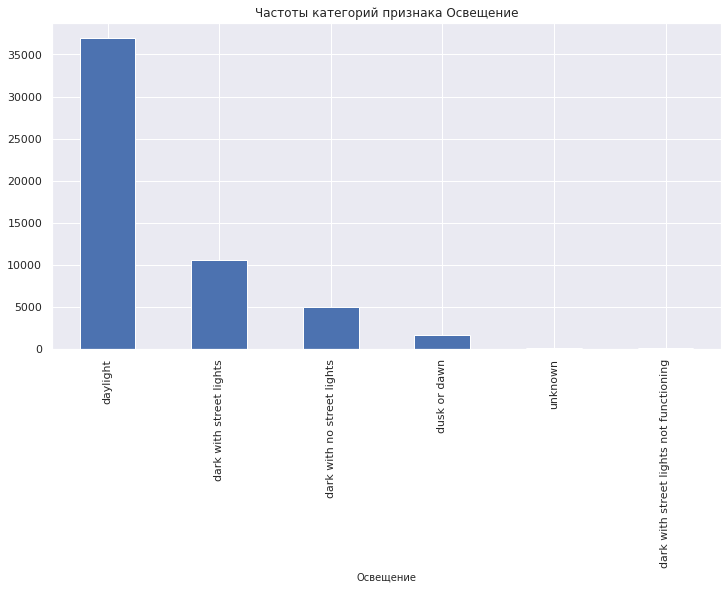

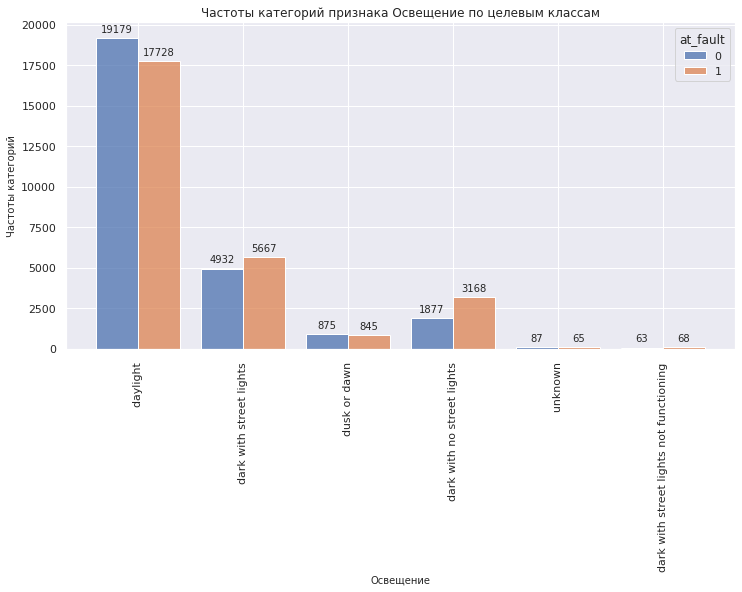

Перед нами категориальный параметр. Значениями столбца 'Освещение' являются: 'daylight', 'dark with street lights', 'dark with no street lights', 'dusk or dawn', 'unknown', 'dark with street lights not functioning'. 
Чаще всего (36907 строк или 67.65% наблюдений) признак 'Освещение' принимает значение 'daylight', в наименьшем количестве наблюдений (131 строка  или 0.24% наблюдений) этот признак принимает значение 'dark with street lights not functioning'.


In [35]:
describe_feature(df, 'lighting', target='at_fault')

Как и в других признаках, категории отличаются количеством и соотношением целевых классов, имеет смысл применить `target encoding` категориальных признаков.

Теперь рассмотрим признак `control_device`.


          === Входной признак 'Устройство управления' ===

Частоты значений признака:


none               36679
functioning        17528
unknown              206
not functioning      112
obscured              29
Name: control_device, dtype: int64

Всего категорий в признаке: 5


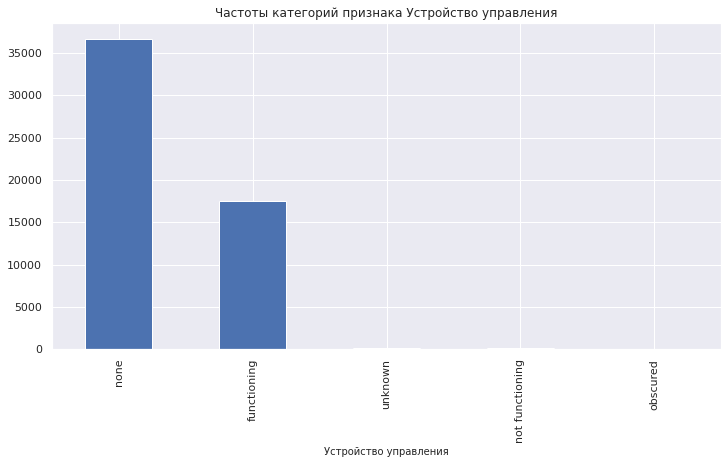

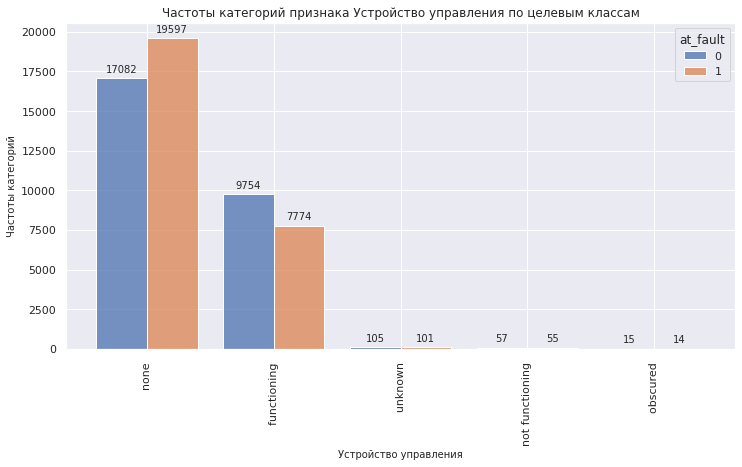

Перед нами категориальный параметр. Значениями столбца 'Устройство управления' являются: 'none', 'functioning', 'unknown', 'not functioning', 'obscured'. 
Чаще всего (36679 строк или 67.23% наблюдений) признак 'Устройство управления' принимает значение 'none', в наименьшем количестве наблюдений (29 строк  или 0.05% наблюдений) этот признак принимает значение 'obscured'.


In [36]:
describe_feature(df, 'control_device', target='at_fault')

Обратимся к признакам, содержащим данные о времени ДТП. На их основе мы создадим синтетические признаки, обобщающие наиболее значимую информацию временнОго характера:  
 - признак `month` с месяцем поездки
 - признак `hour` с часом поездки

In [37]:
df['month'] = pd.DatetimeIndex(pd.to_datetime(df['collision_date'],
                                              format='%Y-%m-%d',
                                              errors='coerce')).month
df['hour'] = pd.DatetimeIndex(pd.to_datetime(df['collision_time'],
                                             format='%H:%M:%S',
                                             errors='coerce')).hour.astype('object')

In [38]:
df = df.drop(['collision_date', 'collision_time'], axis=1)

Исследуем полученные признаки.


          === Входной признак 'Месяц аварии' ===

Частоты значений признака:


3     11182
4     10565
1     10437
2      9980
5      9398
6      1268
8       365
9       328
7       321
11      262
10      259
12      189
Name: month, dtype: int64

Всего категорий в признаке: 12


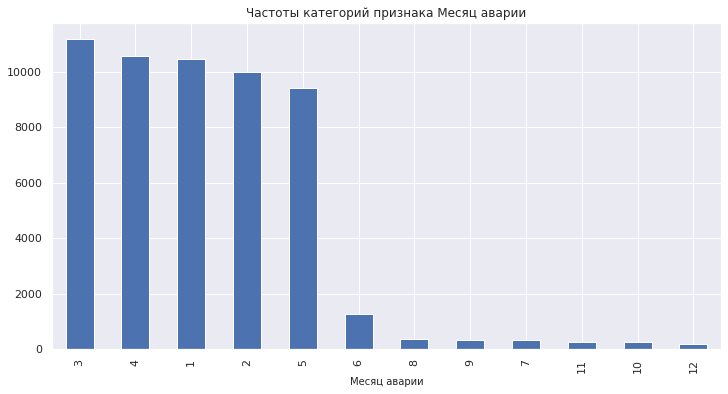

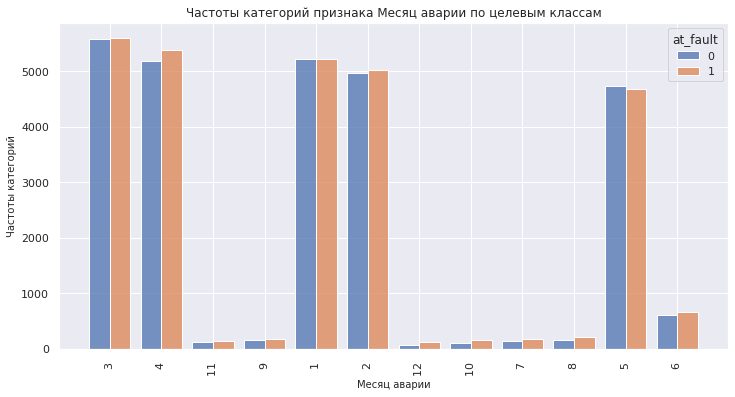

Перед нами категориальный параметр. Значениями столбца 'Месяц аварии' являются: 3, 4, 1, 2, 5, 6, 8, 9, 7, 11, 10, 12. 
Чаще всего (11182 строки или 20.50% наблюдений) признак 'Месяц аварии' принимает значение '3', в наименьшем количестве наблюдений (189 строк  или 0.35% наблюдений) этот признак принимает значение '12'.


In [39]:
describe_feature(df, 'month', target='at_fault')

БОльшая часть данных относится к первым 5-ти месяцам 2012 года.


          === Входной признак 'Час аварии' ===

Частоты значений признака:


15.0    4730
17.0    4112
16.0    4031
14.0    3972
18.0    3590
13.0    3456
12.0    3213
11.0    2779
7.0     2482
19.0    2468
8.0     2454
10.0    2246
20.0    2089
9.0     1968
21.0    1826
22.0    1501
23.0    1332
2.0     1139
1.0     1103
6.0     1091
0.0     1035
3.0      693
5.0      668
4.0      492
Name: hour, dtype: int64

Всего категорий в признаке: 24


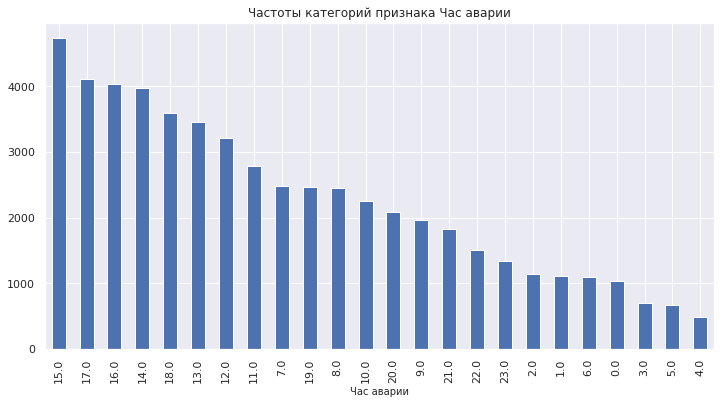

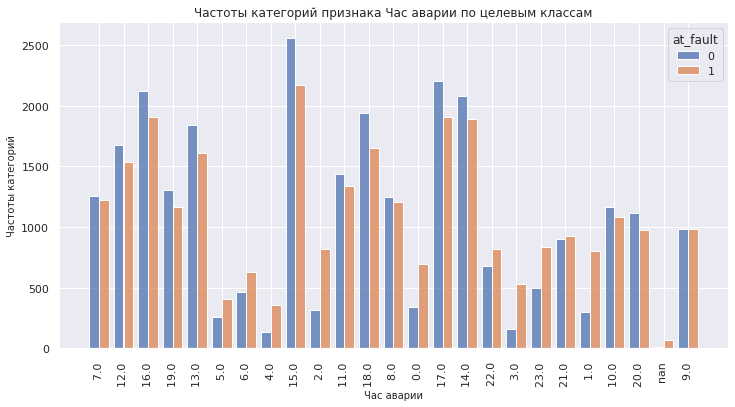

Перед нами категориальный параметр. Значениями столбца 'Час аварии' являются: 15.0, 17.0, 16.0, 14.0, 18.0, 13.0, 12.0, 11.0, 7.0, 19.0, 8.0, 10.0, 20.0, 9.0, ... 
Чаще всего (4730 строк или 8.67% наблюдений) признак 'Час аварии' принимает значение '15.0', в наименьшем количестве наблюдений (492 строки  или 0.90% наблюдений) этот признак принимает значение '4.0'.


In [40]:
describe_feature(df, 'hour', target='at_fault')

Наибольшее количество аварий происходит в дневные часы, ночью соотношение количества виновников ДТП к общему количеству участников увеличивается. Пропуски в значениях признака заполним медианными значениями в пайплайне.

Далее, исследуем признак `cellphone_in_use`.


          === Входной признак 'Наличие телефона в автомобиле' ===

Частоты значений признака:


0.0    49364
1.0     1020
Name: cellphone_in_use, dtype: int64

Всего категорий в признаке: 2


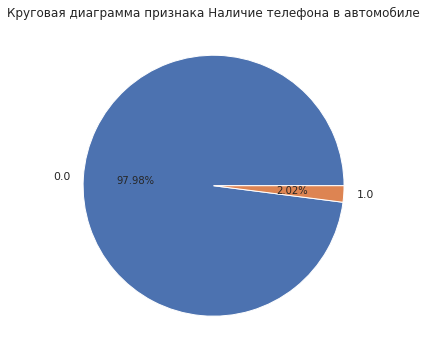

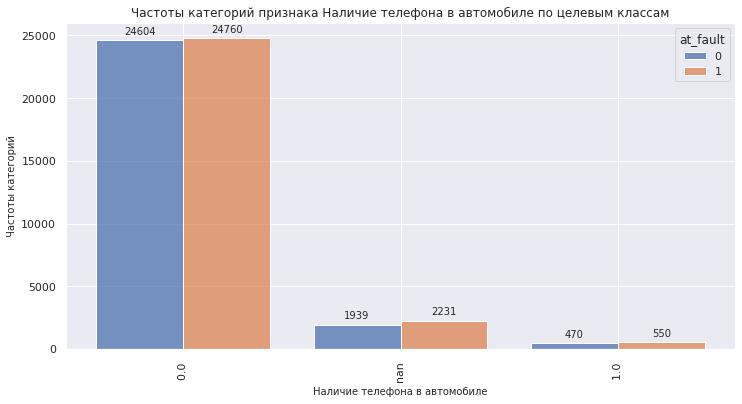

Перед нами категориальный параметр. Значениями столбца 'Наличие телефона в автомобиле' являются: 0.0, 1.0. 
Чаще всего (49364 строки или 90.49% наблюдений) признак 'Наличие телефона в автомобиле' принимает значение '0.0', в наименьшем количестве наблюдений (1020 строк  или 1.87% наблюдений) этот признак принимает значение '1.0'.


In [41]:
describe_feature(df, 'cellphone_in_use', target='at_fault')

Водители, у которых в автомобиле есть устройство громкой связи, относительно реже устраивают ДТП.

Рассмотрим признак `vehicle_type`.


          === Входной признак 'Тип кузова' ===

Частоты значений признака:


sedan    35515
coupe    19035
other        4
Name: vehicle_type, dtype: int64

Всего категорий в признаке: 3


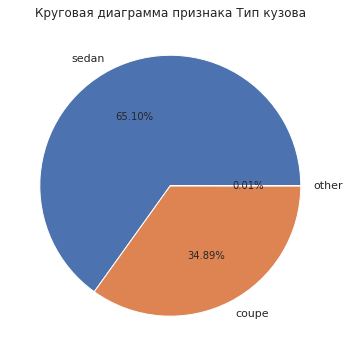

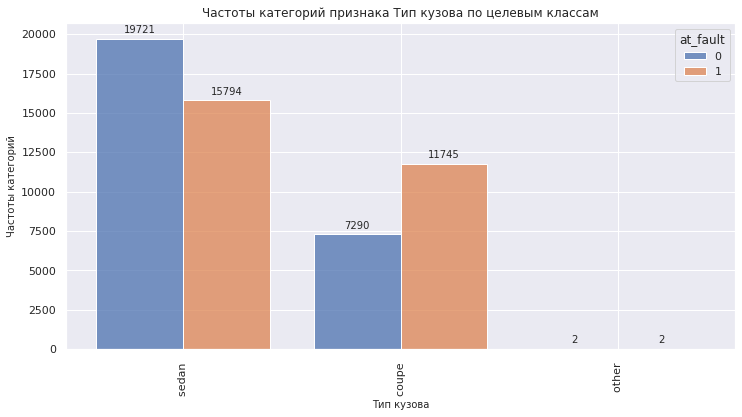

Перед нами категориальный параметр. Значениями столбца 'Тип кузова' являются: 'sedan', 'coupe', 'other'. 
Чаще всего (35515 строк или 65.10% наблюдений) признак 'Тип кузова' принимает значение 'sedan', в наименьшем количестве наблюдений (4 строки  или 0.01% наблюдений) этот признак принимает значение 'other'.


In [42]:
describe_feature(df, 'vehicle_type', target='at_fault')

За 2012 год есть данные в основном по седанам и купе. Процент виновников ДТП среди водителей купе выше, чем среди водителей седанов.

Далее, рассмотрим признак `vehicle_transmission`.


          === Входной признак 'Тип КПП' ===

Частоты значений признака:


manual     28591
auto       25388
unknown      575
Name: vehicle_transmission, dtype: int64

Всего категорий в признаке: 3


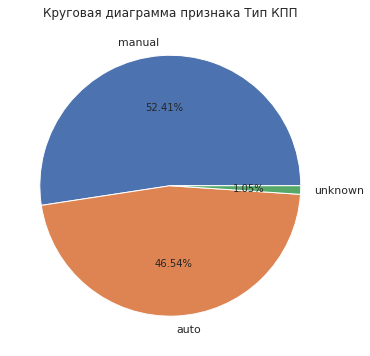

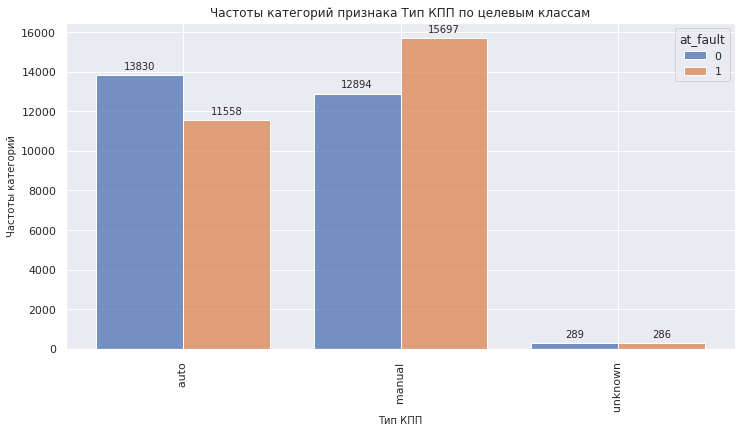

Перед нами категориальный параметр. Значениями столбца 'Тип КПП' являются: 'manual', 'auto', 'unknown'. 
Чаще всего (28591 строка или 52.41% наблюдений) признак 'Тип КПП' принимает значение 'manual', в наименьшем количестве наблюдений (575 строк  или 1.05% наблюдений) этот признак принимает значение 'unknown'.


In [43]:
describe_feature(df, 'vehicle_transmission', target='at_fault')

Для водителей автомобилей с механической КПП риск оказаться виновником ДТП выше.

Наконец, рассмотрим признак `vehicle_age`.


          === Входной признак 'Возраст автомобиля (в годах)' ===

Частоты значений признака:


3.0      11012
4.0       7157
2.0       6048
5.0       5565
6.0       3940
7.0       3838
8.0       3509
0.0       3087
9.0       2770
1.0       2545
10.0      1942
11.0      1380
12.0       879
13.0       551
14.0       282
15.0        37
16.0         6
17.0         3
161.0        2
19.0         1
Name: vehicle_age, dtype: int64

Всего категорий в признаке: 20


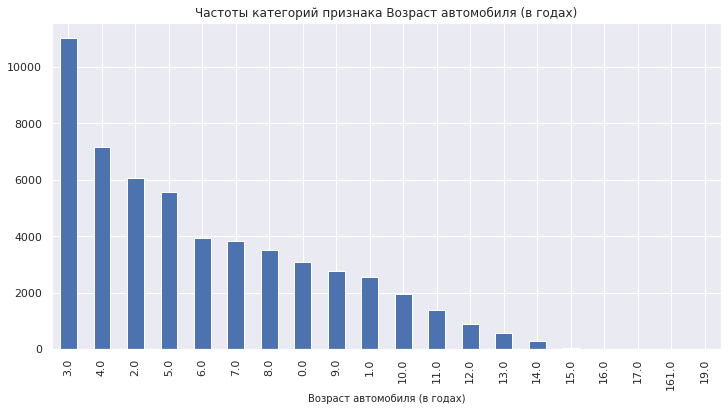

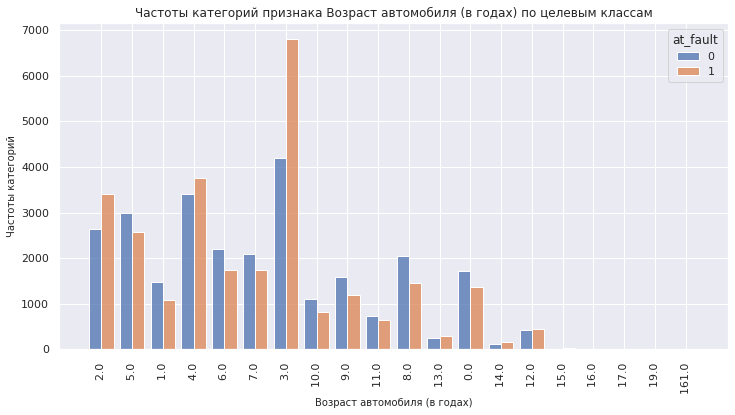

Перед нами категориальный параметр. Значениями столбца 'Возраст автомобиля (в годах)' являются: 3.0, 4.0, 2.0, 5.0, 6.0, 7.0, 8.0, 0.0, 9.0, 1.0, 10.0, 11.0, 12.0, 13.0, ... 
Чаще всего (11012 строки или 20.19% наблюдений) признак 'Возраст автомобиля (в годах)' принимает значение '3.0', в наименьшем количестве наблюдений (1 строка  или 0.00% наблюдений) этот признак принимает значение '19.0'.


In [44]:
describe_feature(df, 'vehicle_age', target='at_fault')

Признак содержит аномалии и редкие категории, на которых обучение вряд ли будет эффективным. Отнесем значения превышающие 16 к категории `16`, которая далее будет означать возраст автомобиля 16 лет или больше. Сделаем это сейчас на копии данных для исследования, впоследствии аналогичное преобразование осуществим в пайплайне.

In [45]:
exploration_data = df.copy()
exploration_data['vehicle_age'] = exploration_data['vehicle_age']                           \
                                                   .apply(lambda x: 16.0 if x > 16 else x)  \
                                                   .astype('int')


          === Входной признак 'Возраст автомобиля (в годах)' ===

Частоты значений признака:


3     11012
4      7157
2      6048
5      5565
6      3940
7      3838
8      3509
0      3087
9      2770
1      2545
10     1942
11     1380
12      879
13      551
14      282
15       37
16       12
Name: vehicle_age, dtype: int64

Всего категорий в признаке: 17


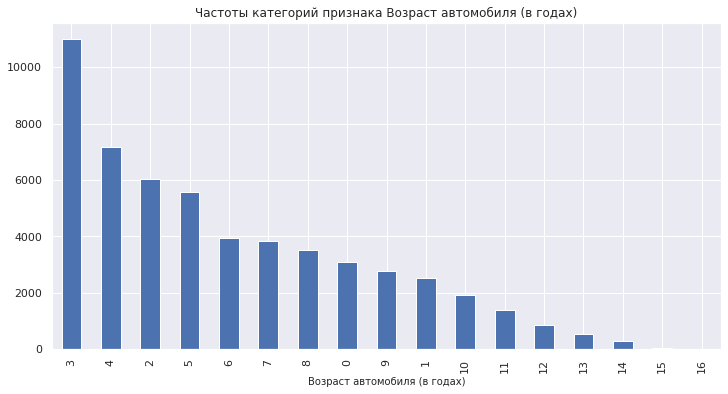

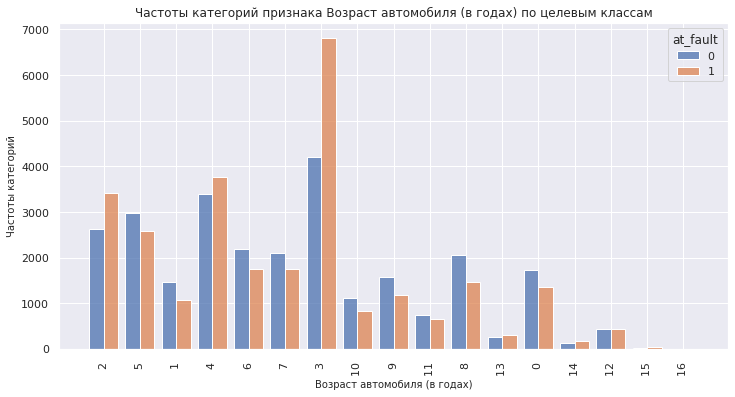

Перед нами категориальный параметр. Значениями столбца 'Возраст автомобиля (в годах)' являются: 3, 4, 2, 5, 6, 7, 8, 0, 9, 1, 10, 11, 12, 13, ... 
Чаще всего (11012 строки или 20.19% наблюдений) признак 'Возраст автомобиля (в годах)' принимает значение '3', в наименьшем количестве наблюдений (12 строк  или 0.02% наблюдений) этот признак принимает значение '16'.


In [46]:
describe_feature(exploration_data, 'vehicle_age', target='at_fault')

Наибольшее количество и процент виновников ДТП среди водителей трехлетних автомобилей.

Теперь посмотрим на корреляцию признаков.

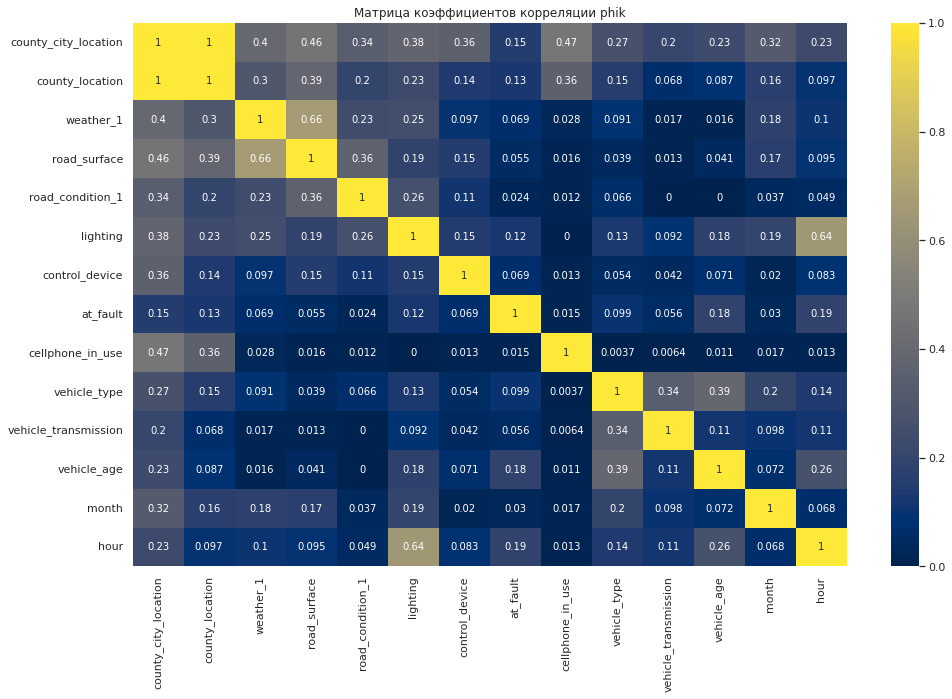

In [47]:
fig, ax = plt.subplots(figsize=(16, 10))
plt.title('Матрица коэффициентов корреляции phik')
sns.heatmap(df.phik_matrix(interval_cols=['hour']), annot=True, cmap='cividis');

Все признаки коррелируют с целевым слабо или очень слабо, лучше других - `hour`, `vehicle_age`, `county_city_location`, `county_location`. Между собой сильнее всего коррелируют входные признаки `lighting` и `hour` и `road_surface` и `weather`, что вполне логично. Мультиколлинеарности среди признаков не наблюдается, кроме информации о районе ДТП, возможно один из этих признаков в будущем стоит удалить из рассмотрения.

Итак, мы провели предобработку и исследовательский анализ данных, в ходе которого сделали следующие наблюдения и шаги:  
 - Для моделирования мы выбрали только те признаки, которые мы имеем или можем получить как только водитель забронировал автомобиль, сел за руль и выбрал маршрут.
 - Данные содержат пропуски, которые были заменены значениями `unknown` для категориальных признаков и будут заменены медианными значениями в пайплайне для количественного признака.
 - Количество и процент виновников ДТП различается для уникальных значений всех выбранных категориальных признаков, мы применим метод целевого кодирования для этих факторов.
 - Все признаки коррелируют с целевым слабо или очень слабо, мультиколлинеарности среди признаков не наблюдается.

### 6.4 Построение пайплайна и выбор лучшей модели

Подготовим обучающую и тестовые выборки. При этом сделаем стратификацию по географическому признаку, поскольку нам важно научиться предсказывать ДТП в разных регионах, ситуация в которых может существенно различаться.

In [48]:
# сформируем выборки
X_train, X_test, y_train, y_test = train_test_split(
        df.drop(['at_fault'], axis=1),
        df['at_fault'],
        test_size = TEST_SIZE, 
        random_state = RANDOM_STATE,
        stratify = df.drop(['at_fault'], axis=1)['county_location']
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43643, 13), (10911, 13), (43643,), (10911,))

In [49]:
# создадим списки числовых и категориальных признаков
num_cols = ['hour']
cat_cols = X_train.columns.to_list()
cat_cols.remove('hour')

   Для заказчика важно предотвратить потенциальное ДТП, то есть как можно точнее выявить потенциальных виновников аварии или потенциально опасные поездки, возможно, не беспокоя всех клиентов подряд. Для этих целей подойдет метрика ROC-AUC, максимизация которой позволит найти путем выбора порога вероятности предсказания классов оптимальное для заказчика сочетание процента точности и полноты предсказания. Мы будем использовать эту метрику для подбора гиперпараметров и оценки качества модели.

В пайплайне создадим модели трех типов: линейной регрессии, случайного леса и градиентного бустинга (`sklearn.linear_model.LogisticRegression`, `catboost.CatBoostClassifier` и `sklearn.ensemble.RandomForestClassifier`) с подбором гиперпараметров моделей с помощью инструмента `sklearn.model_selection.GridSearchCV` с кроссвалидацией. Пропуски в числовых данных заполним медианными значениями с помощью класса `sklearn.impute.SimpleImputer`. Категориальные данные закодируем с помощью `sklearn.preprocessing.TargetEncoder`, числовой признак масштабируем через `sklearn.preprocessing.StandardScaler`.

<a id='correction3'></a>
Для использования в пайплайне создадим класс трансформера отдельных колонок и соответствующие функции, трансформирующие значения колонок.

In [50]:
# Cоздадим трансформер отдельных колонок функцией func с преобразованием типа данных колонки
class CustomColumnTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column: str, dtype: type, func):
        self.column = column
        self.dtype = dtype
        self.func = func
        self.feature_names_ = None  # Для хранения имен фичей

    def fit(self, X, y=None):
        # Сохраняем имена фичей, если X - DataFrame
        if isinstance(X, pd.DataFrame):
            self.feature_names_ = X.columns.tolist()
        else:
            self.feature_names_ = [f"x{i}" for i in range(X.shape[1])]
        return self

    def transform(self, X):
        X_transformed = X.copy()
        # Преобразуем в DataFrame, если передан массив
        if not isinstance(X_transformed, pd.DataFrame):
            X_transformed = pd.DataFrame(X_transformed, columns=self.feature_names_)
        # Трансформируем колонку
        X_transformed[self.column] = X_transformed[self.column].apply(self.func)
        # Меняем тип данных указанной колонки
        X_transformed[self.column] = X_transformed[self.column].astype(self.dtype)
        return X_transformed

    def get_feature_names_out(self, input_features=None):
        # Возвращаем имена фичей (требуется для совместимости с Pipeline)
        return np.array(self.feature_names_)
    
# Создадим функцию для трансформации признака cellphone_in_use
def cellphone_in_use_trf(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return 'yes'
    elif x is np.nan:
        return x
    else:
        return str(x) + '_new_category'
    
# Создадим функцию для трансформации признака vehicle_age
def vehicle_age_trf(x):
    if x > 16:
        return 16.
    else:
        return x

Создадим пайплайн.

In [51]:
# создаём пайплайн для подготовки числовых признаков
num_pipe = Pipeline(
    [
     ('simpleImputer_num', SimpleImputer(missing_values=np.nan, strategy='median')),
     ('standardScaler_num', StandardScaler())
    ]
    )

# создаём пайплайн для подготовки категориальных признаков
cat_pipe = Pipeline(
    [
     ('cellphone_in_use_Transformer_cat', CustomColumnTransformer(column='cellphone_in_use',
                                                                  dtype=object,
                                                                  func=cellphone_in_use_trf)),
     ('vehicle_age_Transformer_cat', CustomColumnTransformer(column='vehicle_age',
                                                                  dtype=int,
                                                                  func=vehicle_age_trf)),
     ('simpleImputer_cat', SimpleImputer(missing_values=np.nan,
                                         strategy='constant',
                                         fill_value='unknown')),
     ('encoder_cat', TargetEncoder(random_state=RANDOM_STATE))
    ]
    )

# создаём пайплайн для подготовки категориальных признаков для catboost
catboost_pipe = Pipeline(
    [
     ('cellphone_in_use_Transformer_catboost', CustomColumnTransformer(column='cellphone_in_use',
                                                                    dtype=object,
                                                                    func=cellphone_in_use_trf)),
     ('vehicle_age_Transformer_catboost', CustomColumnTransformer(column='vehicle_age',
                                                                  dtype=int,
                                                                  func=vehicle_age_trf)),
     ('simpleImputer_catboost', SimpleImputer(missing_values=np.nan,
                                         strategy='constant',
                                         fill_value='unknown')),
     ('encoder_cat', 'passthrough')
    ]
    )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [
     ('num', num_pipe, num_cols),
     ('cat', cat_pipe, cat_cols),     
    ], 
    remainder='passthrough'
)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', LogisticRegression(
        random_state=RANDOM_STATE,
        max_iter=300,
        penalty='l2'))
])

# словарь для модели LogisticRegression()
lr_params = {
    'models': [LogisticRegression(
        random_state=RANDOM_STATE,
        max_iter=300,
        penalty='l2'
    )],
    'models__C': range(1, 3),
    'preprocessor__cat': [cat_pipe]
}

# словарь для модели CatBoostClassifier()
catboost_params  =  {
    'models': [CatBoostClassifier(logging_level='Silent',
                                  cat_features=[_ for _ in range(1, 13)],
                                  class_weights=[0.45, 0.55],
                                  random_seed=RANDOM_STATE)],
    'models__min_data_in_leaf': [1],
    'models__iterations': [400],
    'models__learning_rate': [0.04, 0.05],
    'preprocessor__cat': [catboost_pipe]
}

# словарь для модели RandomForestClassifier()
randomforest_params  =  {
    'models': [RandomForestClassifier(n_jobs=-1,
                                      random_state=RANDOM_STATE)],
    'models__n_estimators': [300],
    'models__max_depth': [10],
    'models__min_samples_split': [4, 5],
    'preprocessor__cat': [cat_pipe]
}

param_grid = [
    catboost_params,
    randomforest_params,
    lr_params
]

grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring=['roc_auc', 'precision', 'recall'],
    refit='roc_auc',
    n_jobs=-1
)

In [ ]:
grid_search.fit(X_train, y_train);

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('simpleImputer_num',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardScaler_num',
                                                                                          StandardScaler())]),
                                                                         ['hour']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('cellphone_in_use_Transformer_cat',
                                                                                          CustomColumnTransformer(column='cellphone_in_...
                                                                                         func=<function cellphone_in_use_trf at 0x7fe1b5619040>)),
                                                                ('vehicle_age_Transformer_cat',
                                                                 CustomColumnTransformer(column='vehicle_age',
                                                                                         dtype=<class 'int'>,
                                                                                         func=<function vehicle_age_trf at 0x7fe1b5619700>)),
                                                                ('simpleImputer_cat',
                                                                 SimpleImputer(fill_value='unknown',
                                                                               strategy='constant')),
                                                                ('encoder_cat',
                                                                 TargetEncoder(random_state=666))])]}],
             refit='roc_auc', scoring=['roc_auc', 'precision', 'recall'])

In [53]:
model = grid_search.best_estimator_
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
display(model)
display(grid_search.best_params_)
print ('Метрика лучшей модели по результатам кроссвалидации на тренировочной выборке:',
       grid_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleImputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardScaler_num',
                                                                   StandardScaler())]),
                                                  ['hour']),
                                                 ('cat',
                                                  Pipeline(steps=[('cellphone_in_use_Transformer_catboost',
                                                                   CustomColumnTransformer(column='cellphone_in_use',
                                                                                           dtype=<class 'ob

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('simpleImputer_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardScaler_num',
                                                                   StandardScaler())]),
                                                  ['hour']),
                                                 ('cat',
                                                  Pipeline(steps=[('cellphone_in_use_Transformer_catboost',
                                                                   CustomColumnTransformer(column='cellphone_in_use',
                                                                                           dtype=<class 'objec...
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('encoder_cat',
                                                                   'passthrough')]),
                                                  ['county_city_location',
                                                   'county_location',
                                                   'weather_1', 'road_surface',
                                                   'road_condition_1',
                                                   'lighting', 'control_device',
                                                   'cellphone_in_use',
                                                   'vehicle_type',
                                                   'vehicle_transmission',
                                                   'vehicle_age', 'month'])])),
                ('models',
                 <catboost.core.CatBoostClassifier object at 0x7fe1b5533700>)])

{'models': <catboost.core.CatBoostClassifier at 0x7fe1b5aedac0>,
 'models__iterations': 400,
 'models__learning_rate': 0.05,
 'models__min_data_in_leaf': 1,
 'preprocessor__cat': Pipeline(steps=[('cellphone_in_use_Transformer_catboost',
                  CustomColumnTransformer(column='cellphone_in_use',
                                          dtype=<class 'object'>,
                                          func=<function cellphone_in_use_trf at 0x7fe1b5619040>)),
                 ('vehicle_age_Transformer_catboost',
                  CustomColumnTransformer(column='vehicle_age',
                                          dtype=<class 'int'>,
                                          func=<function vehicle_age_trf at 0x7fe1b5619700>)),
                 ('simpleImputer_catboost',
                  SimpleImputer(fill_value='unknown', strategy='constant')),
                 ('encoder_cat', 'passthrough')])}

Метрика лучшей модели по результатам кроссвалидации на тренировочной выборке: 0.6727742339397329


Посмотрим, как модели показали себя в сравнении.

In [54]:
results = pd.DataFrame(grid_search.cv_results_)
results['param_models'] = results['param_models'].apply(lambda x: str(x))
pd.set_option('display.max_colwidth', None)

In [55]:
(results[['rank_test_roc_auc', 'param_models', 'mean_test_roc_auc', 'params']]
        .sort_values(by=['rank_test_roc_auc'])
        .groupby('param_models', sort=False)
        .head(1))

,rank_test_roc_auc,param_models,mean_test_roc_auc,params
1,1,<catboost.core.CatBoostClassifier object at 0x7fe1b5aedac0>,0.672774,"{'models': <catboost.core.CatBoostClassifier object at 0x7fe1b5aedac0>, 'models__iterations': 400, 'models__learning_rate': 0.05, 'models__min_data_in_leaf': 1, 'preprocessor__cat': (CustomColumnTransformer(column='cellphone_in_use', dtype=<class 'object'>, func=<function cellphone_in_use_trf at 0x7fe1b5619040>), CustomColumnTransformer(column='vehicle_age', dtype=<class 'int'>, func=<function vehicle_age_trf at 0x7fe1b5619700>), SimpleImputer(fill_value='unknown', strategy='constant'), 'passthrough')}"
2,3,"RandomForestClassifier(n_jobs=-1, random_state=666)",0.663423,"{'models': RandomForestClassifier(n_jobs=-1, random_state=666), 'models__max_depth': 10, 'models__min_samples_split': 4, 'models__n_estimators': 300, 'preprocessor__cat': (CustomColumnTransformer(column='cellphone_in_use', dtype=<class 'object'>, func=<function cellphone_in_use_trf at 0x7fe1b5619040>), CustomColumnTransformer(column='vehicle_age', dtype=<class 'int'>, func=<function vehicle_age_trf at 0x7fe1b5619700>), SimpleImputer(fill_value='unknown', strategy='constant'), TargetEncoder(random_state=666))}"
5,5,"LogisticRegression(max_iter=300, random_state=666)",0.655279,"{'models': LogisticRegression(max_iter=300, random_state=666), 'models__C': 2, 'preprocessor__cat': (CustomColumnTransformer(column='cellphone_in_use', dtype=<class 'object'>, func=<function cellphone_in_use_trf at 0x7fe1b5619040>), CustomColumnTransformer(column='vehicle_age', dtype=<class 'int'>, func=<function vehicle_age_trf at 0x7fe1b5619700>), SimpleImputer(fill_value='unknown', strategy='constant'), TargetEncoder(random_state=666))}"


Итак, лучшей моделью оказалась модель градиентного бустинга. Модель случайного леса немного отстала по метрике на кроссвалидации. Логистическая регрессия показала себя заметно хуже.

### 6.5 Оценка результатов лучшей модели

<a id='correction4'></a>
Выведем ROC-AUC, точность и полноту предсказания по результатам кроссвалидации.

In [56]:
print('По результатам кроссвалидации для лучшей модели:\n')
print(f"Метрика ROC-AUC: {results['mean_test_roc_auc'][grid_search.best_index_]:.4f}")
print(f"Точность: {results['mean_test_precision'][grid_search.best_index_]:.4f}")
print(f"Полнота: {results['mean_test_recall'][grid_search.best_index_]:.4f}")

По результатам кроссвалидации для лучшей модели:

Метрика ROC-AUC: 0.6728
Точность: 0.6119
Полнота: 0.6810


Судя по метрикам модель показала неплохие результаты на тренировочной выборке. Далее, оценим ее результаты на тестовой выборке. 

Рассчитаем прогноз на тестовых данных, выведем ROC-AUC, «Матрицу ошибок», точность и полноту предсказания.

Метрика ROC-AUC на тестовой выборке: 0.6718973359127743


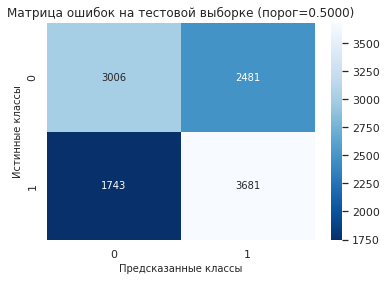

Полнота:  0.6787
Точность:  0.5974
Accuracy:  0.6129


In [57]:
treshold = 0.5
y_test_pred = grid_search.predict(X_test)
y_test_pred_proba = grid_search.predict_proba(X_test)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке:'
      f' {roc_auc_score(y_test, y_test_pred_proba)}')

test_preds = pd.DataFrame({'test_labels': y_test,
                            'pred_proba': y_test_pred_proba})
test_preds['test_preds'] = test_preds['pred_proba'].apply(lambda x: 1 if x > treshold else 0)

cm = confusion_matrix(y_test, test_preds['test_preds'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.title(f'Матрица ошибок на тестовой выборке (порог={treshold:.4f})')
plt.ylabel('Истинные классы')
plt.xlabel('Предсказанные классы')
plt.show();
recall = recall_score(y_test, test_preds['test_preds'])
precision = precision_score(y_test, test_preds['test_preds'])
accuracy = accuracy_score(y_test, test_preds['test_preds'])

print('Полнота: ',round(recall ,4))
print('Точность: ',round(precision,4))
print('Accuracy: ',round(accuracy,4))

<a id='correction5'></a>
На тестовой выборке результаты модели сравнимы с таковыит на кроссвалидации, модель не переобучилась. Интерпретируем значения тестовых метрик.

In [58]:
print(f'\n  Рассмотрим значения матрицы ошибок, двигаясь по часовой стрелке и начиная с левой верхней ячейки.')
print(f'  В первой ячейке - количество верно предсказанных случаев невиновности в ДТП: {cm[0, 0]}.')
print(f'  Во второй ячейке - количество невиновных водителей, которых модель идентифицировала как '
      f'виновных в ДТП: {cm[0, 1]}. Таким образом, для всех невиновных водителей из тестовой '
      f'выборки модель сделала верные предсказания в {cm[0, 0]/(cm[0, 1]+cm[0, 0]):.2%} случаев.')
print(f'  В третьей ячейке - количество верно предсказанных случаев виновности в ДТП: {cm[1, 1]}.')
print(f'  В четвертой - количество виновных водителей, которых модель идентифицировала как '
      f'невиновных в ДТП: {cm[1, 0]}. Таким образом, для всех виновных водителей из тестовой '
      f'выборки модель сделала верные предсказания в {cm[1, 1]/(cm[1, 1]+cm[1, 0]):.2%} случаев.')
print(f'  Последний показатель соответствует значению метрики Полнота: {recall:.4f}.')
print(f'  Значение метрики Точность ({precision:.4f}) показывает долю верно предсказанных случаев '
      f'виновности в ДТП от всех предсказаний с таким исходом. То есть, для всех водителей из '
      f'тестовой выборки, кого модель идентифицировала как виновных, она сделала правильные '
      f'предсказания в {cm[1, 1]/(cm[1, 1]+cm[0, 1]):.2%} случаев.')
print(f'Значение метрики Accuracy ({accuracy:.4f}) показывает, что лучшая модель сделала верные '
      f'предсказания для     {accuracy:.2%} всех тестовых объектов.')


  Рассмотрим значения матрицы ошибок, двигаясь по часовой стрелке и начиная с левой верхней ячейки.
  В первой ячейке - количество верно предсказанных случаев невиновности в ДТП: 3006.
  Во второй ячейке - количество невиновных водителей, которых модель идентифицировала как виновных в ДТП: 2481. Таким образом, для всех невиновных водителей из тестовой выборки модель сделала верные предсказания в 54.78% случаев.
  В третьей ячейке - количество верно предсказанных случаев виновности в ДТП: 3681.
  В четвертой - количество виновных водителей, которых модель идентифицировала как невиновных в ДТП: 1743. Таким образом, для всех виновных водителей из тестовой выборки модель сделала верные предсказания в 67.87% случаев.
  Последний показатель соответствует значению метрики Полнота: 0.6787.
  Значение метрики Точность (0.5974) показывает долю верно предсказанных случаев виновности в ДТП от всех предсказаний с таким исходом. То есть, для всех водителей из тестовой выборки, кого модель идентифиц

<a id='correction6'></a>
Проверим лучшую модель на адекватность, сравнив качество её предсказаний с качеством модели, которая предсказывала бы константу.

In [59]:
dummy_clf = DummyClassifier(random_state=RANDOM_STATE)
dummy_clf.fit(X_train, y_train)
dummy_preds = dummy_clf.predict(X_test)
dummy_clf.predict_proba(X_test)[:, 1]
print('Метрика ROC-AUC константной модели:', roc_auc_score(y_test,
                                                           dummy_clf.predict_proba(X_test)[:, 1]))
print('Точность константной модели:', precision_score(y_test, dummy_preds))
print('Полнота константной модели:', recall_score(y_test, dummy_preds))
print('Accuracy константной модели:', accuracy_score(y_test, dummy_preds))

Метрика ROC-AUC константной модели: 0.5
Точность константной модели: 0.4971130052240858
Полнота константной модели: 1.0
Accuracy константной модели: 0.4971130052240858


Полнота константной модели будет превосходить полноту любой неидеальной модели. По другим метрикам наша лучшая модель существенно превосходит константную, что доказывает ее ценность.

### 6.6 Анализ важности факторов ДТП

Посмотрим на важность признаков для модели бустинга, используя встроенный в модель метод оценки важности входных признаков.

In [60]:
feature_importances = pd.DataFrame({
    'Признак': grid_search.best_estimator_.named_steps['preprocessor'].get_feature_names_out(),
    'Важность': model.named_steps['models'].feature_importances_}).sort_values(by='Важность', ascending=False)
feature_importances

,Признак,Важность
9,cat__vehicle_type,16.953279
11,cat__vehicle_age,16.196349
0,num__hour,13.636011
1,cat__county_city_location,10.581436
7,cat__control_device,9.448478
2,cat__county_location,6.847714
12,cat__month,5.551596
6,cat__lighting,4.910286
10,cat__vehicle_transmission,4.846711
4,cat__road_surface,3.920620


Для лучшей модели наиболее важными оказались признаки с информацией о типе ТС, возрасте автомобиля, времени суток и районе поездки. Наименее значимой оказалась информация о наличии громкой связи и состоянии дорог.

Теперь проанализируем важность признаков с помощью SHAP-значений.

In [61]:
# трансформируем тренировочные данные отобранным методом
X_sampled = X_train.sample(n=10000, random_state=RANDOM_STATE)
y_sampled = y_train[X_sampled.index]
X_train_transformed = pd.DataFrame(grid_search.best_estimator_
                                              .named_steps['preprocessor']
                                              .transform(X_sampled))
X_train_transformed.columns = (grid_search.best_estimator_
                                          .named_steps['preprocessor']
                                          .get_feature_names_out())

In [62]:
pool = Pool(X_train_transformed, y_sampled, cat_features=[_ for _ in range(1, 13)])
shap_values_catboost = grid_search.best_estimator_.named_steps['models'].get_feature_importance(pool, type='ShapValues')

In [63]:
shap_values = shap_values_catboost[:, :-1]
base_value = shap_values_catboost[0, -1]

# Создание SHAP Explanation object
explanation = shap.Explanation(
    values=shap_values,
    base_values=base_value,
    data=X_train_transformed.values,
    feature_names=X_train_transformed.columns.tolist()
)

Визуализируем значимость и влияние признаков на предсказания лучшей модели.

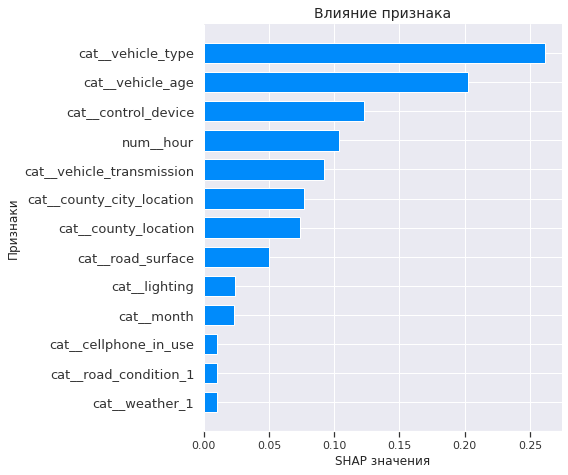

In [64]:
# Общая значимость признаков
shap.summary_plot(explanation, X_train_transformed, plot_type="bar", show=False)
plt.title("Влияние признака", fontsize=14)
plt.xlabel("SHAP значения", fontsize=12)
plt.ylabel("Признаки", fontsize=12)
plt.tight_layout()
plt.show()

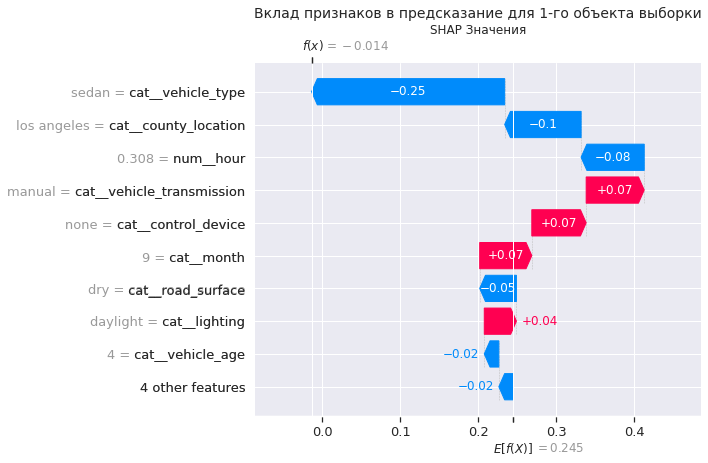

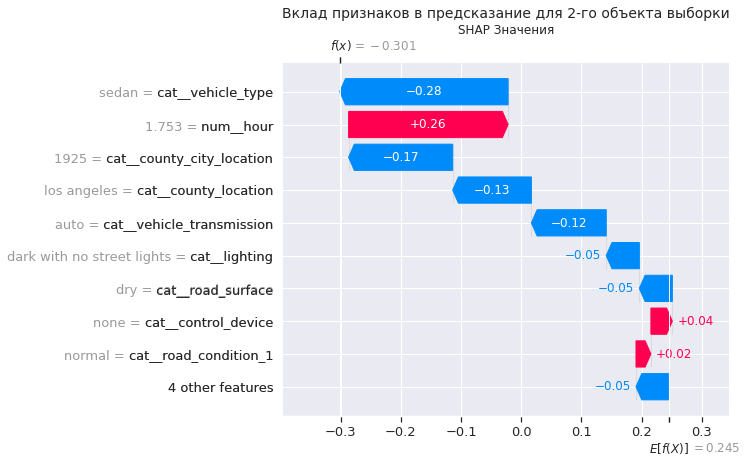

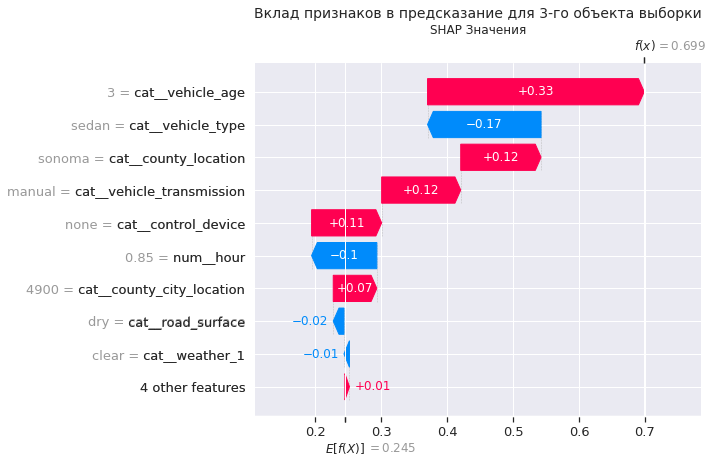

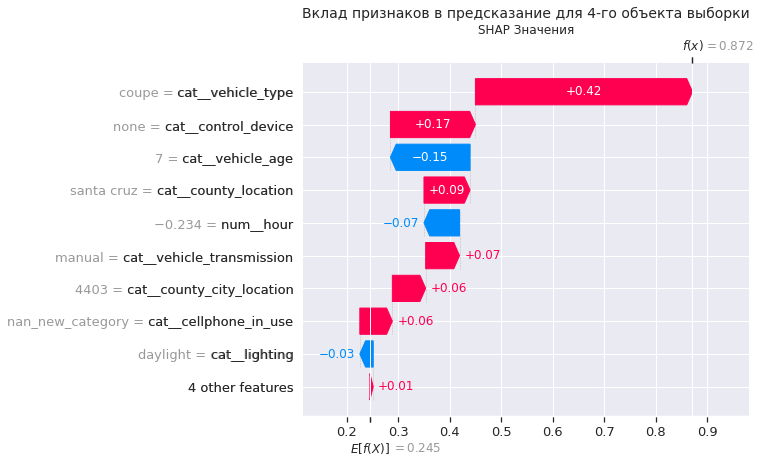

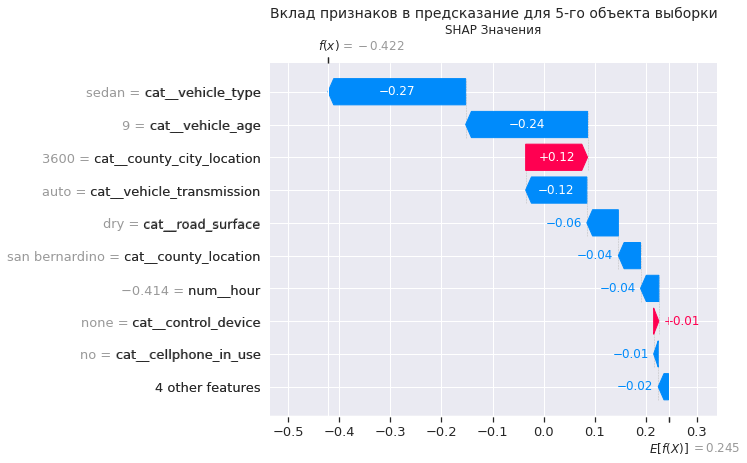

In [65]:
# Вклад признаков в предсказание для пяти первых объектов выборки
for _ in range(0, 5):
    shap.plots.waterfall(explanation[_], max_display=10, show=False)
    plt.title(f"Вклад признаков в предсказание для {_+1}-го объекта выборки", fontsize=14)
    plt.xlabel("SHAP Значения", fontsize=12)
    plt.show()

Анализ SHAP значений показал сходную картину важности признаков со встроенной в модель статистикой значимости.


     Разброс SHAP-значений для признака Тип кузова


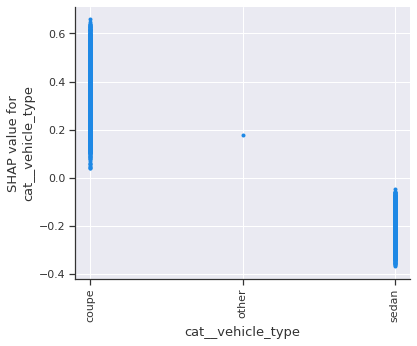


     Разброс SHAP-значений для признака Возраст автомобиля (в годах)


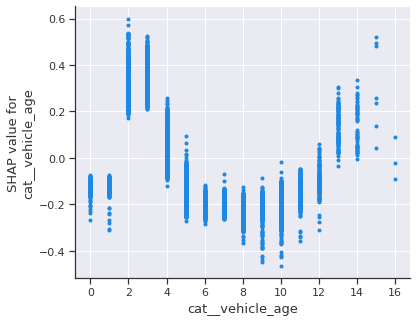


     Разброс SHAP-значений для признака Час аварии


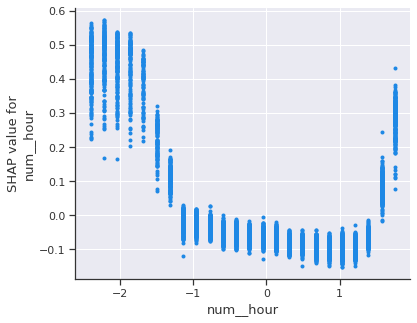

In [66]:
# Dependence Plot для пяти наиболее важных признаков
for feature in feature_importances['Признак'][:3]:
    print(f"\n     Разброс SHAP-значений для признака {features[feature[5:]]}")
    shap.dependence_plot(feature,
                         shap_values,
                         X_train_transformed,
                         interaction_index=None)

Можно заметить, что важными сигналами повышенного риска ДТП являются:
 - тип автомобиля - купе,
 - возраст автомобиля более 12-ти лет (повышенный риск ДТП наблюдается для атомобиле возрастом менее 5 лет, но в контексте нашего исследования, это может объясняться вообще большой долей таких автомобилей).
 - вечернее и ночное время поездки.

Также, заметное влияние оказывает география ДТП, что говорит о потенциале использования данных о маршруте поездки для предсказания риска ДТП.

Еще раз рассмотрим важный признак с информацией о типе автомобиля. Выведем частоты целевых классов для категорий признака.

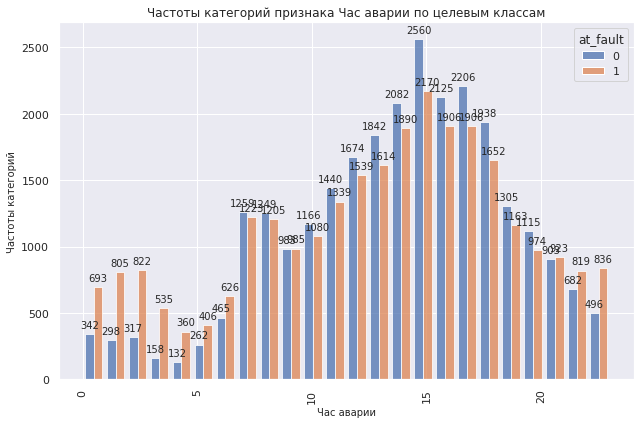

In [71]:
column = 'hour'
target = 'at_fault'
fig, ax = plt.subplots(figsize=(9, 6));
splot = sns.histplot(data=df, x=column, hue=target, multiple='dodge', shrink=0.8, bins=24);
for p in splot.patches: 
    splot.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')
plt.title(f'Частоты категорий признака {features[column]} по целевым классам');
plt.ylabel(f'Частоты категорий')
plt.xlabel(features[column])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Можно заметить, что в ночное и вечернее время доля виновников среди всех участников ДТП значительно возрастает, что может свидетельствовать в том числе о повышенном риске ДТП. Можно порекомендовать заказчику оснастить автомобили каршеринга голосовыми устройствами, предупреждающими водителей о рисках вождения в ночное и вечернее время.

Также, можно порекомендовать заказчику: 
 - оснастить алкогольным анализатором,
 - если есть такая возможность, предлагать более безопасный маршрут в вечернее и ночное время,
 - не использовать для сдачи в аренду автомобили с типом кузова купе.

## 7. Общий вывод

Проанализировав и обработав предоставленные данные, мы создали и обучили 3 модели для предсказания вероятности ДТП. По результатам кросс-валидации на тренировочных данных и, используя метрику оценки качества ROC-AUC, мы выбрали модель градиентного бустинга Catboost с автоматической обработкой категориальных признаков и масштабированием признаков числовых. Были подобраны наиболее эффективные гиперпараметры ('models__iterations': 400, 'models__learning_rate': 0.05, 'models__min_data_in_leaf': 1).  
Модель показала значение метрики ROC-AUC на тестовой выборке: 0.7322. При этом большинство наблюдений классифицируются верно. Для более 67% объектов класса 1 ("Виновен в ДТП") и более половины объектов класса 0 ("Не виновен в ДТП") модель дает правильные предсказания, что говорит о ее полезности, по меньшей мере в качестве отправной точки работы над поставленной задачей.  

Для улучшения работы модели нужно больше данных, в том числе не только о поездках, закончившихся аварией, но и о поездках, завершившихся благополучно.  
Нужно больше признаков, которые можно получить, анализируя предстоящий маршрут, поскольку на данный момент имеющиеся признаки, относящиеся к этой категории, показали себя как средне значимые, хотя по логике они должны оказывать существенное влияние на прогноз.